# Forecast Package

### Cargamos las librerías y los datos

In [61]:
library(forecast)

library(ggplot2)
library(zoo)
library(rdatamarket)

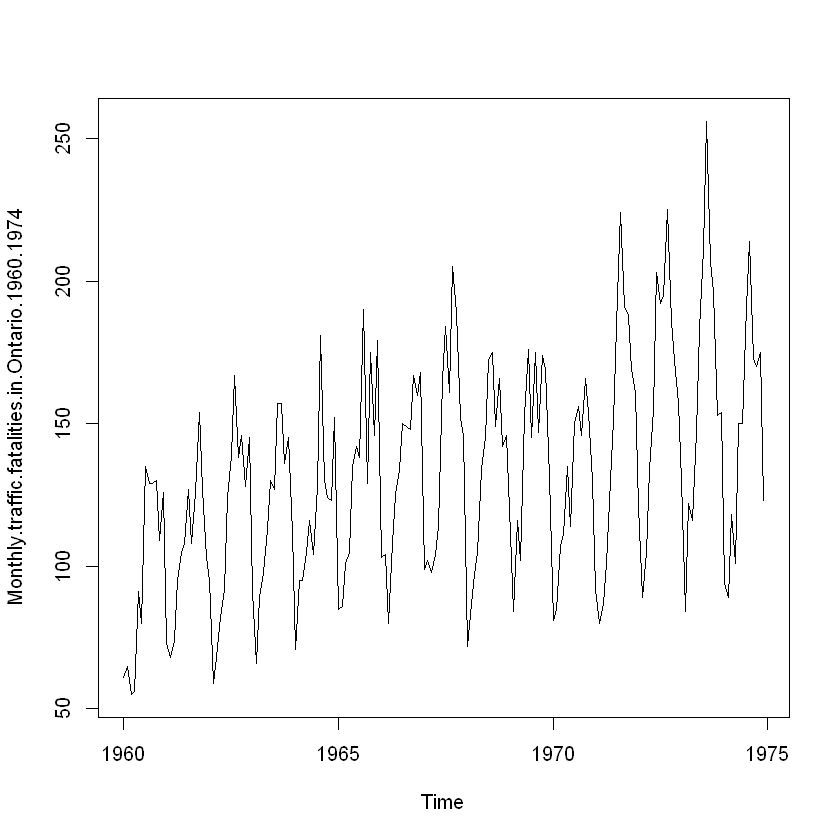

In [62]:
accidentes <- as.ts(dmseries('http://data.is/1yFXOBi'))
plot(accidentes)

<br>

## Preprocesado

### Dividimos los datos en training y test

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


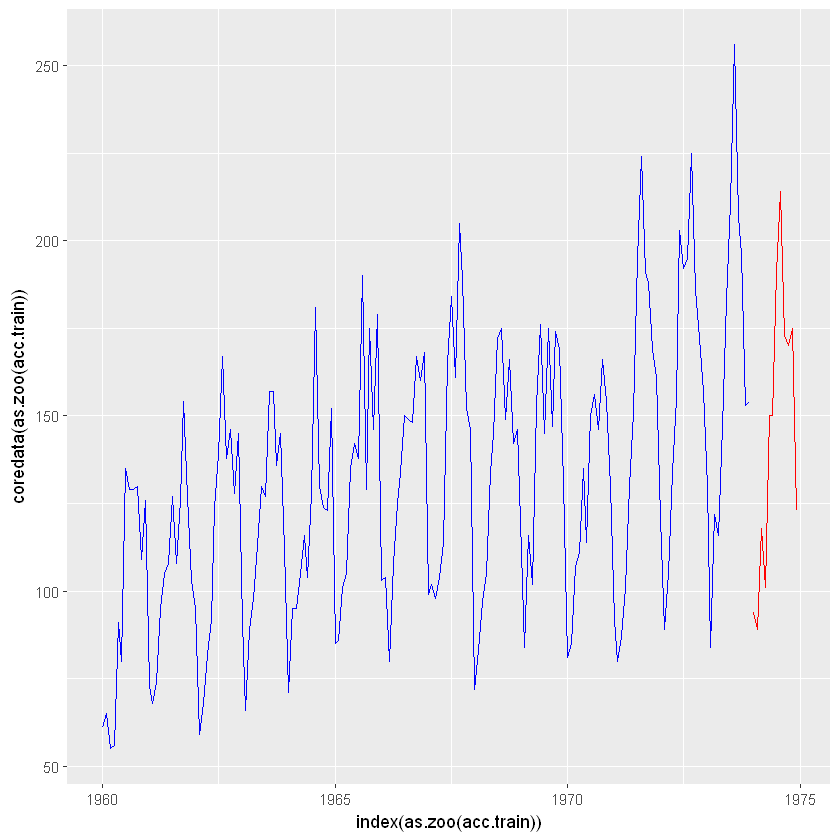

In [63]:
acc.train <- window(x = accidentes, start = c(1960,1), end = c(1973,12))
acc.test <- window(x = accidentes, start = c(1974,1))

p <- ggplot() +
  geom_line(aes(x = index(as.zoo(acc.train)), y = coredata(as.zoo(acc.train))), col = 'blue') +
  geom_line(aes(x = index(as.zoo(acc.test)), y = coredata(as.zoo(acc.test))), col = 'red')
p

In [64]:
# Función genérica para plotting de test vs pred a través de ggplot2
combine <- function(test, pred) {
  require(ggplot2)
  p <- ggplot() +
    geom_line(aes(x = index(as.zoo(test)), y = coredata(as.zoo(test)), colour = 'Test')) +
    geom_line(aes(x = index(as.zoo(test)), y = pred, colour = 'Prediccion')) +
    scale_color_manual(name = 'Leyenda', values = c('Test' = 'black', 'Prediccion' = 'red'),
                       labels = c('Test','Prediccion'))
  p
}

<br>

### Frecuencia estacional de nuestros datos

In [65]:
findfrequency(x = acc.train)

[1] 12

In [66]:
monthdays(x = acc.train)

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1960  31  29  31  30  31  30  31  31  30  31  30  31
1961  31  28  31  30  31  30  31  31  30  31  30  31
1962  31  28  31  30  31  30  31  31  30  31  30  31
1963  31  28  31  30  31  30  31  31  30  31  30  31
1964  31  29  31  30  31  30  31  31  30  31  30  31
1965  31  28  31  30  31  30  31  31  30  31  30  31
1966  31  28  31  30  31  30  31  31  30  31  30  31
1967  31  28  31  30  31  30  31  31  30  31  30  31
1968  31  29  31  30  31  30  31  31  30  31  30  31
1969  31  28  31  30  31  30  31  31  30  31  30  31
1970  31  28  31  30  31  30  31  31  30  31  30  31
1971  31  28  31  30  31  30  31  31  30  31  30  31
1972  31  29  31  30  31  30  31  31  30  31  30  31
1973  31  28  31  30  31  30  31  31  30  31  30  31

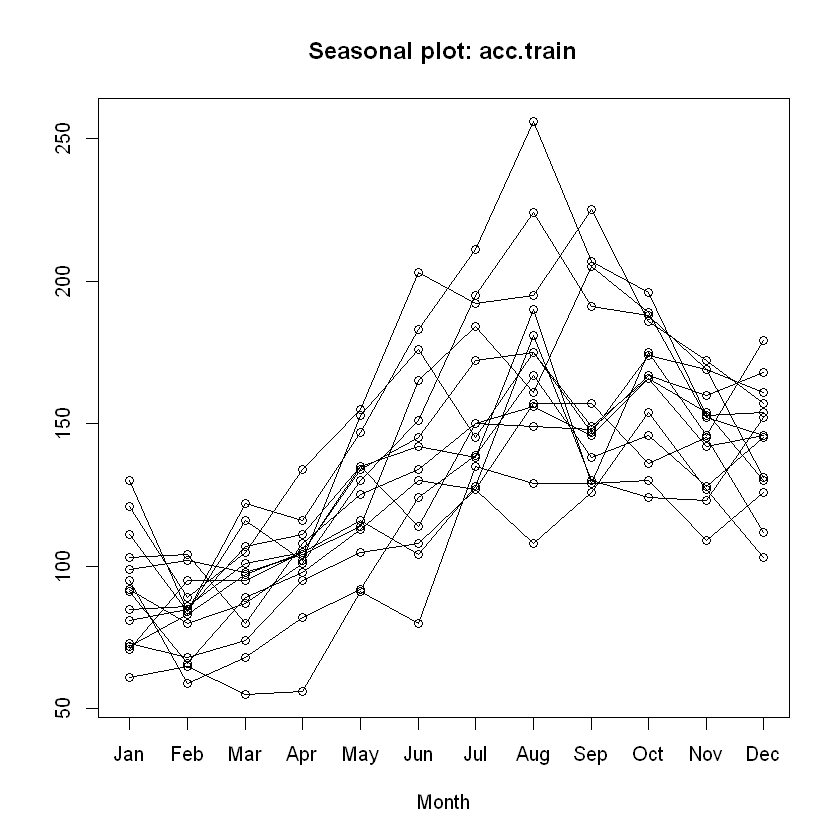

In [67]:
seasonplot(x = acc.train, s = 12)
seasonplot(x = acc.train, s = findfrequency(acc.train))

<br>

### Descomposición aditiva de una serie temporal e idenpendecia de los residuos (Stats package)

In [69]:
acc.train.decomp.adi <- decompose(x = acc.train, type = 'additive')

In [70]:
seasonal(object = acc.train.decomp.adi)

            Jan        Feb        Mar        Apr        May        Jun
1960 -37.168536 -48.511485 -37.322382 -28.014690  -6.213408  10.863515
1961 -37.168536 -48.511485 -37.322382 -28.014690  -6.213408  10.863515
1962 -37.168536 -48.511485 -37.322382 -28.014690  -6.213408  10.863515
1963 -37.168536 -48.511485 -37.322382 -28.014690  -6.213408  10.863515
1964 -37.168536 -48.511485 -37.322382 -28.014690  -6.213408  10.863515
1965 -37.168536 -48.511485 -37.322382 -28.014690  -6.213408  10.863515
1966 -37.168536 -48.511485 -37.322382 -28.014690  -6.213408  10.863515
1967 -37.168536 -48.511485 -37.322382 -28.014690  -6.213408  10.863515
1968 -37.168536 -48.511485 -37.322382 -28.014690  -6.213408  10.863515
1969 -37.168536 -48.511485 -37.322382 -28.014690  -6.213408  10.863515
1970 -37.168536 -48.511485 -37.322382 -28.014690  -6.213408  10.863515
1971 -37.168536 -48.511485 -37.322382 -28.014690  -6.213408  10.863515
1972 -37.168536 -48.511485 -37.322382 -28.014690  -6.213408  10.863515
1973 -

In [71]:
trendcycle(object = acc.train.decomp.adi)

           Jan       Feb       Mar       Apr       May       Jun       Jul
1960        NA        NA        NA        NA        NA        NA  97.66667
1961 106.41667 105.20833 104.20833 105.08333 106.83333 106.62500 106.58333
1962 105.91667 108.87500 111.83333 112.00000 111.70833 113.50000 115.08333
1963 120.33333 119.41667 119.79167 120.16667 120.45833 119.79167 117.58333
1964 118.37500 119.41667 119.29167 117.66667 116.25000 117.00000 119.25000
1965 124.75000 125.54167 125.87500 127.95833 131.04167 133.12500 135.00000
1966 134.75000 133.54167 132.62500 133.08333 133.33333 133.45833 132.83333
1967 136.75000 138.66667 141.54167 144.83333 145.41667 144.16667 142.12500
1968 138.91667 139.00000 137.25000 133.95833 132.58333 132.16667 133.79167
1969 139.87500 138.75000 138.66667 138.91667 140.37500 140.87500 139.00000
1970 131.37500 130.79167 129.95833 129.58333 128.62500 127.95833 128.37500
1971 130.45833 135.16667 139.87500 142.66667 144.20833 146.12500 148.62500
1972 161.12500 159.79167 

In [72]:
remainder(object = acc.train.decomp.adi)

             Jan         Feb         Mar         Apr         May         Jun
1960          NA          NA          NA          NA          NA          NA
1961   3.7518697  11.3031517   7.1140491  17.9313568   4.3800748  -9.4885150
1962  26.2518697  -1.3635150  -6.5109509  -1.9853098 -13.4949252  -0.3635150
1963   7.8352030  -4.9051816   6.5307158   5.8480235  -1.2449252  -0.6551816
1964 -10.2064637  24.0948184  13.0307158  15.3480235   5.9634081 -23.8635150
1965  -2.5814637   8.9698184  12.4473825   5.0563568  10.1717415  -1.9885150
1966   5.4185363  18.9698184 -15.3026175   2.9313568  -2.1199252 -10.3218483
1967  -0.5814637  11.8448184  -6.2192842 -12.8186432 -25.2032585   9.9698184
1968 -29.7481303  -7.4885150  -2.9276175  -0.9436432   7.6300748   1.9698184
1969   8.2935363  -6.2385150  14.6557158  -8.9019765  18.8384081  24.2614850
1970 -13.2064637   2.7198184  14.3640491   9.4313568  12.5884081 -24.8218483
1971  -1.2897970  -6.6551816 -15.5526175 -13.6519765  -7.9949252  -5.9885150

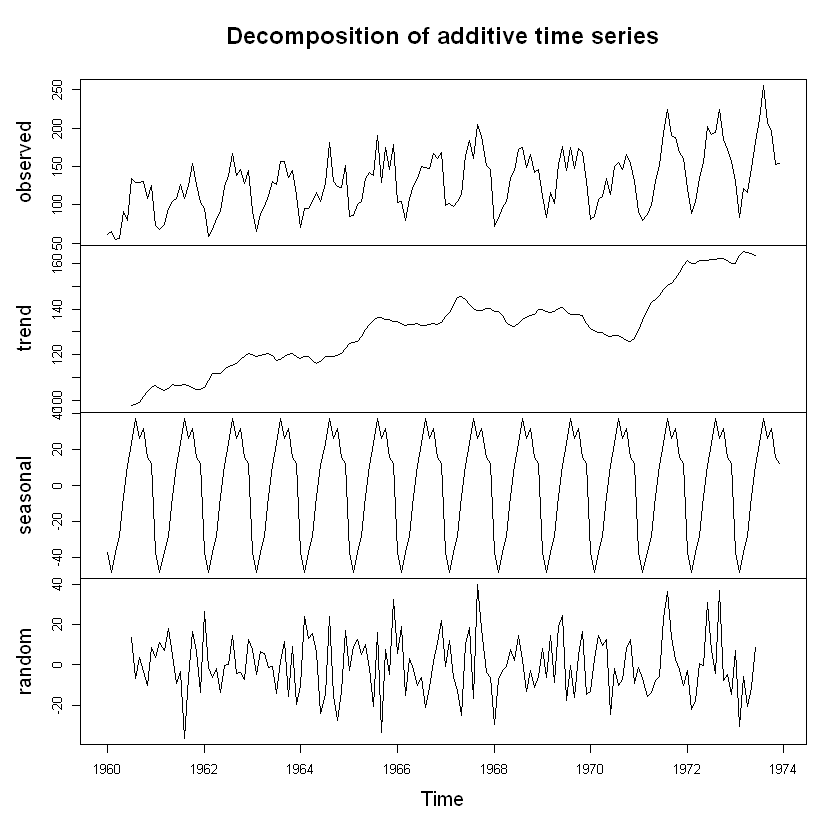

In [73]:
plot(acc.train.decomp.adi)

In [74]:
Box.test(x = acc.train.decomp.adi$random, type = 'Ljung-Box') # Son ruido blanco


	Box-Ljung test

data:  acc.train.decomp.adi$random
X-squared = 0.53055, df = 1, p-value = 0.4664


<br>

### Descomposición multplicativa de una serie temporal e independencia de los residuos (STATS PACKAGE)

In [75]:
acc.train.decomp.mult <- decompose(x = acc.train, type = 'multiplicative')

In [76]:
seasonal(object = acc.train.decomp.mult)

           Jan       Feb       Mar       Apr       May       Jun       Jul
1960 0.7148019 0.6338028 0.7173630 0.7920348 0.9524885 1.0709980 1.1812258
1961 0.7148019 0.6338028 0.7173630 0.7920348 0.9524885 1.0709980 1.1812258
1962 0.7148019 0.6338028 0.7173630 0.7920348 0.9524885 1.0709980 1.1812258
1963 0.7148019 0.6338028 0.7173630 0.7920348 0.9524885 1.0709980 1.1812258
1964 0.7148019 0.6338028 0.7173630 0.7920348 0.9524885 1.0709980 1.1812258
1965 0.7148019 0.6338028 0.7173630 0.7920348 0.9524885 1.0709980 1.1812258
1966 0.7148019 0.6338028 0.7173630 0.7920348 0.9524885 1.0709980 1.1812258
1967 0.7148019 0.6338028 0.7173630 0.7920348 0.9524885 1.0709980 1.1812258
1968 0.7148019 0.6338028 0.7173630 0.7920348 0.9524885 1.0709980 1.1812258
1969 0.7148019 0.6338028 0.7173630 0.7920348 0.9524885 1.0709980 1.1812258
1970 0.7148019 0.6338028 0.7173630 0.7920348 0.9524885 1.0709980 1.1812258
1971 0.7148019 0.6338028 0.7173630 0.7920348 0.9524885 1.0709980 1.1812258
1972 0.7148019 0.6338028 

In [77]:
trendcycle(object = acc.train.decomp.mult)

           Jan       Feb       Mar       Apr       May       Jun       Jul
1960        NA        NA        NA        NA        NA        NA  97.66667
1961 106.41667 105.20833 104.20833 105.08333 106.83333 106.62500 106.58333
1962 105.91667 108.87500 111.83333 112.00000 111.70833 113.50000 115.08333
1963 120.33333 119.41667 119.79167 120.16667 120.45833 119.79167 117.58333
1964 118.37500 119.41667 119.29167 117.66667 116.25000 117.00000 119.25000
1965 124.75000 125.54167 125.87500 127.95833 131.04167 133.12500 135.00000
1966 134.75000 133.54167 132.62500 133.08333 133.33333 133.45833 132.83333
1967 136.75000 138.66667 141.54167 144.83333 145.41667 144.16667 142.12500
1968 138.91667 139.00000 137.25000 133.95833 132.58333 132.16667 133.79167
1969 139.87500 138.75000 138.66667 138.91667 140.37500 140.87500 139.00000
1970 131.37500 130.79167 129.95833 129.58333 128.62500 127.95833 128.37500
1971 130.45833 135.16667 139.87500 142.66667 144.20833 146.12500 148.62500
1972 161.12500 159.79167 

In [78]:
remainder(object = acc.train.decomp.mult)

           Jan       Feb       Mar       Apr       May       Jun       Jul
1960        NA        NA        NA        NA        NA        NA 1.1701849
1961 0.9596823 1.0197756 0.9898977 1.1414200 1.0318648 0.9457493 1.0087453
1962 1.2547973 0.8550070 0.8476151 0.9243822 0.8646543 1.0200869 1.0225144
1963 1.0579612 0.8720168 1.0356773 1.0296694 0.9848767 1.0132768 0.9143765
1964 0.8390979 1.2551756 1.1101318 1.1266566 1.0476236 0.8299632 0.9086961
1965 0.9532189 1.0808275 1.1185179 1.0360398 1.0815949 0.9959558 0.8653910
1966 1.0693570 1.2287468 0.8408638 1.0246035 0.9842639 0.9374982 0.9559854
1967 1.0127964 1.1605769 0.9651678 0.9066101 0.8230589 1.0686375 1.0960098
1968 0.7250909 0.9421263 0.9851910 0.9896356 1.0610996 1.0243713 1.0883447
1969 1.1101896 0.9551952 1.1661300 0.9270466 1.1443053 1.1665143 0.8831211
1970 0.8625546 1.0253796 1.1477326 1.0815076 1.1019164 0.8318550 0.9891858
1971 0.9865754 0.9338266 0.8670421 0.8938293 0.9464404 0.9648588 1.1107334
1972 1.0505984 0.8787831 

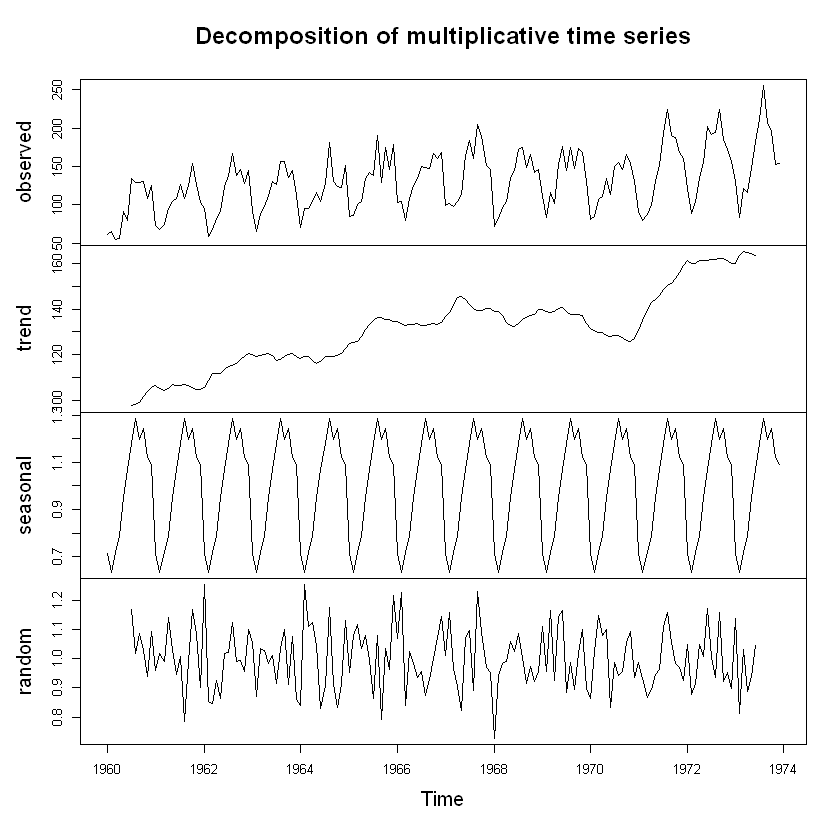

In [79]:
plot(acc.train.decomp.mult)

In [80]:
Box.test(x = acc.train.decomp.mult$random, type = 'Ljung-Box') # Son ruido blanco


	Box-Ljung test

data:  acc.train.decomp.mult$random
X-squared = 0.088749, df = 1, p-value = 0.7658


<br>

### Desestacionalización a través de objetos decompose

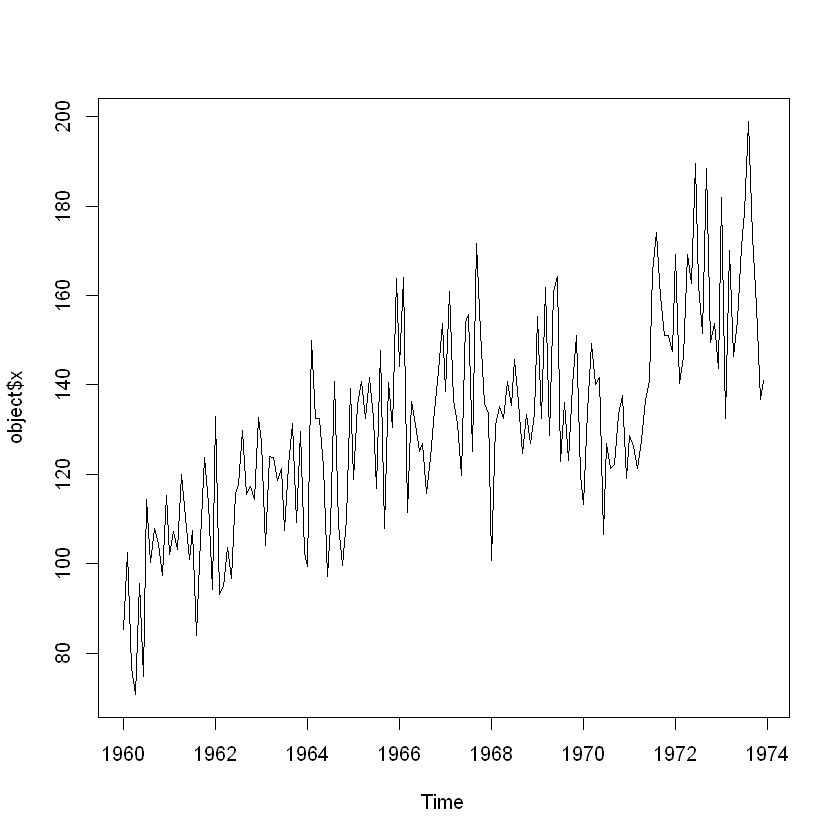

In [83]:
acc.train.seasadj <- seasadj(acc.train.decomp.mult)
plot(acc.train.seasadj)

In [84]:
ndiffs(x = acc.train.seasadj, test = 'kpss', alpha = 0.05) # 1

[1] 1

In [85]:
ndiffs(x = acc.train.seasadj, test = 'adf') # 0

[1] 0

In [86]:
ndiffs(x = acc.train.seasadj, test = 'pp') # 0

[1] 0

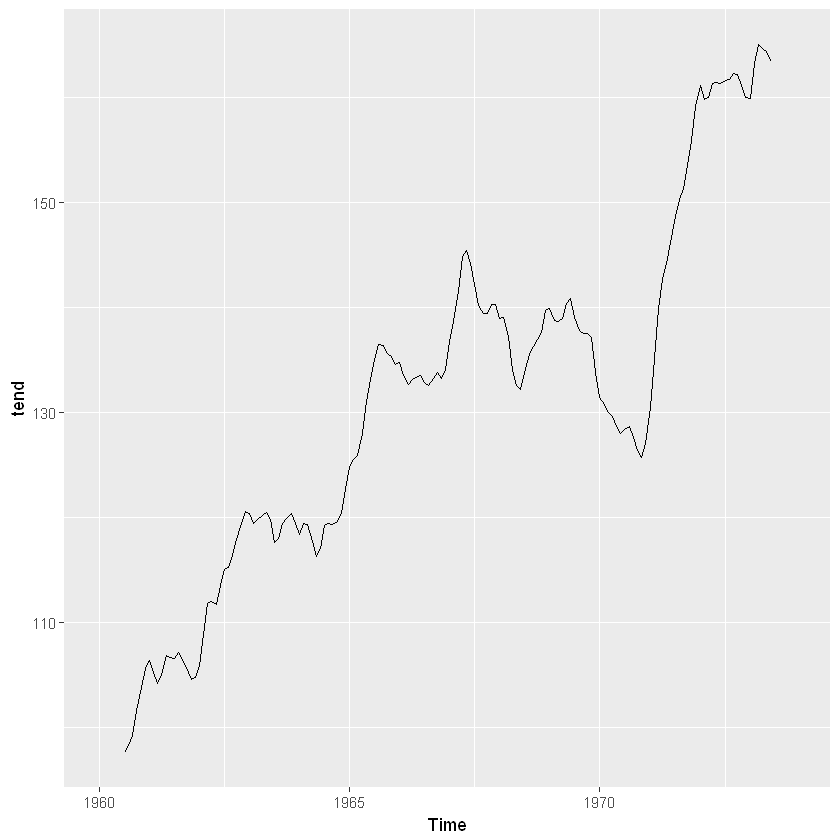

In [87]:
tend <- ma(x = acc.train, order = 12) # tendencia con medias móviles a partir de ma()
autoplot(tend)

<br>

## Modelización

### Prediciendo nuevos valores con la media

In [89]:
model.1 <- meanf(y = acc.train, h = 12)
class(model.1) # forecast

[1] "forecast"

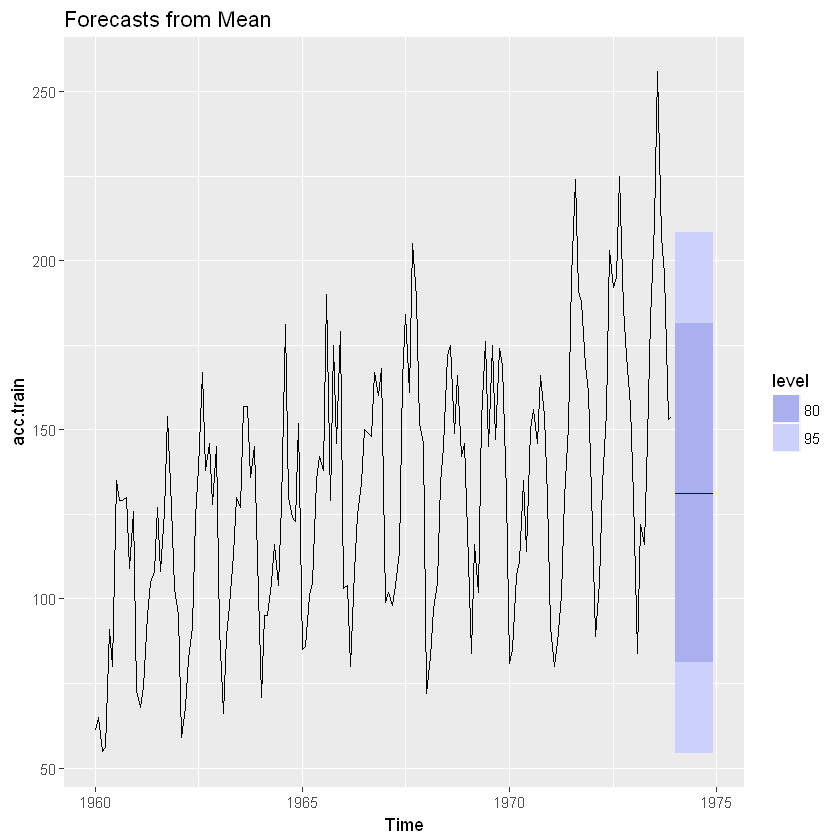

In [90]:
autoplot(model.1)

In [91]:
model.1$mean[1] == mean(acc.train) # TRUE

[1] TRUE

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


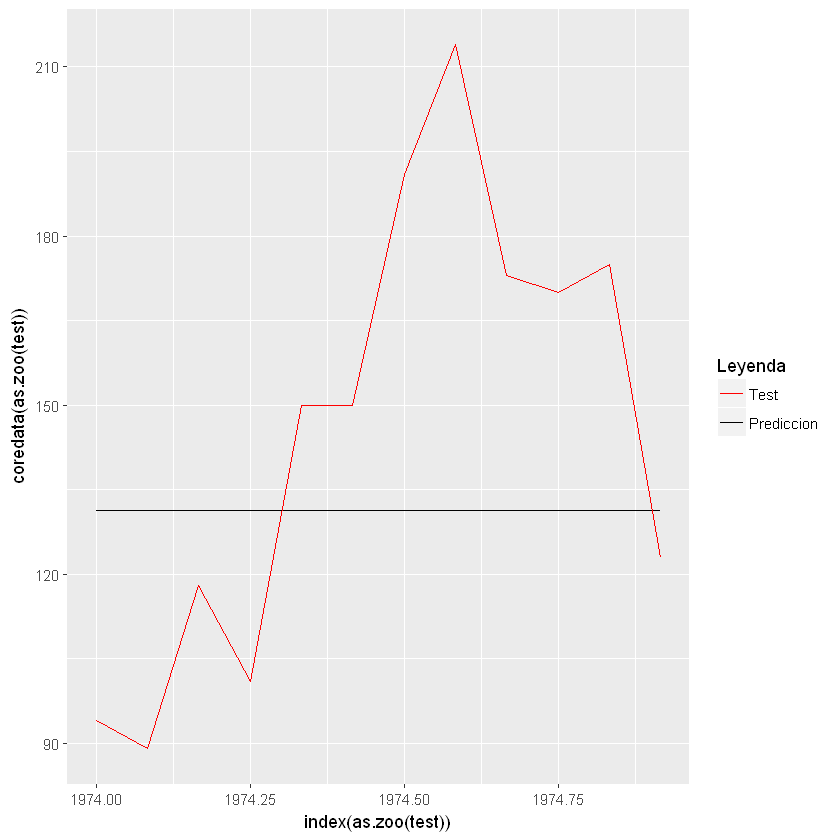

In [92]:
combine(model.1$mean, acc.test)

In [93]:
# Medimos la precisión del modelo
accuracy(f = model.1, x = acc.test) # 36.28770

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,5.392491e-15,38.73302,31.48058,-10.085477,27.71539,1.774836,0.7359523,NA
Test set,1.439286e+01,41.43521,36.28770,2.639993,25.15689,2.045855,0.6310518,1.205019



	Box-Ljung test

data:  model.1$residuals
X-squared = 92.628, df = 1, p-value < 2.2e-16



	Ljung-Box test

data:  Residuals from Mean
Q* = 687.35, df = 23, p-value < 2.2e-16

Model df: 1.   Total lags used: 24



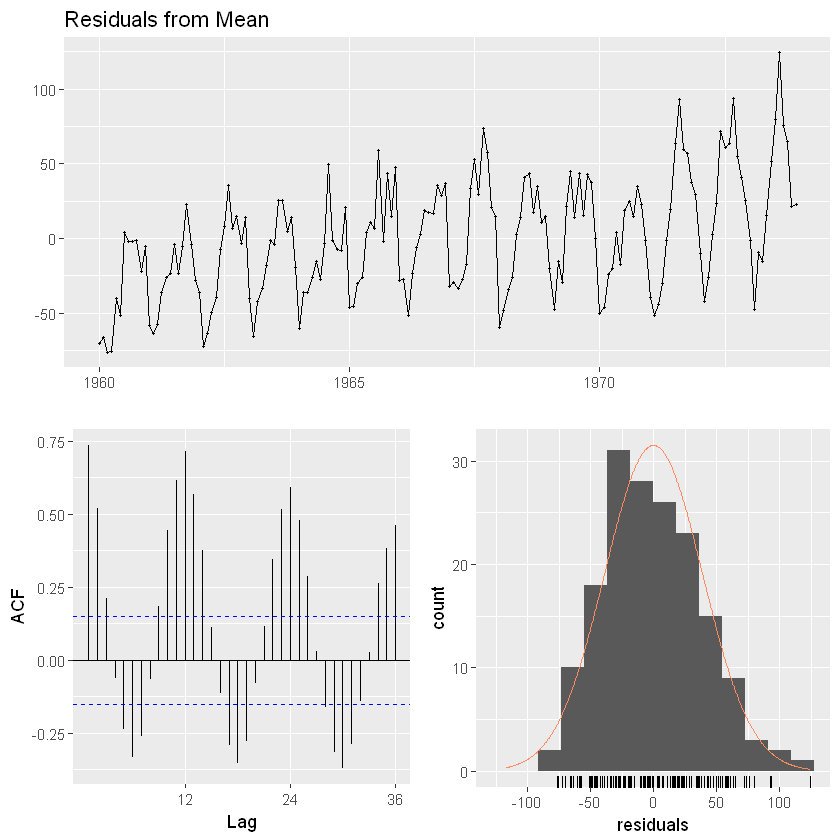

In [94]:
# Revisamos los residuos
Box.test(x = model.1$residuals, type = 'Ljung-Box')
checkresiduals(model.1) # No son ruido blanco

<br>

### Modelo ingenuo en el que se predice con el valor anterior observado

In [96]:
model.2 <- naive(y = acc.train, h = 12)
class(model.2)

[1] "forecast"

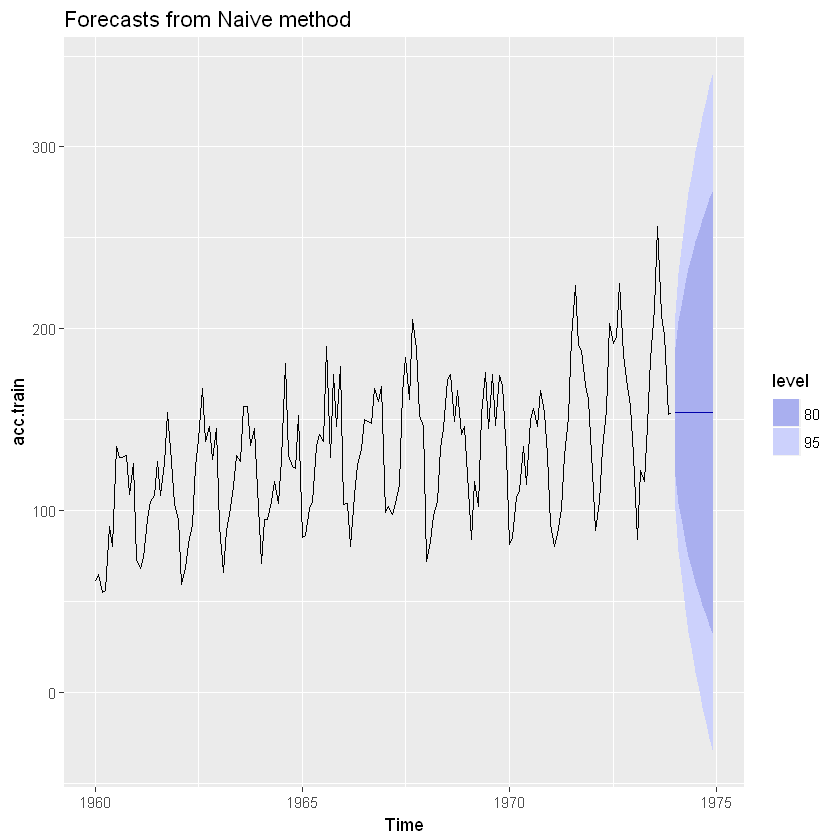

In [97]:
autoplot(model.2)

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


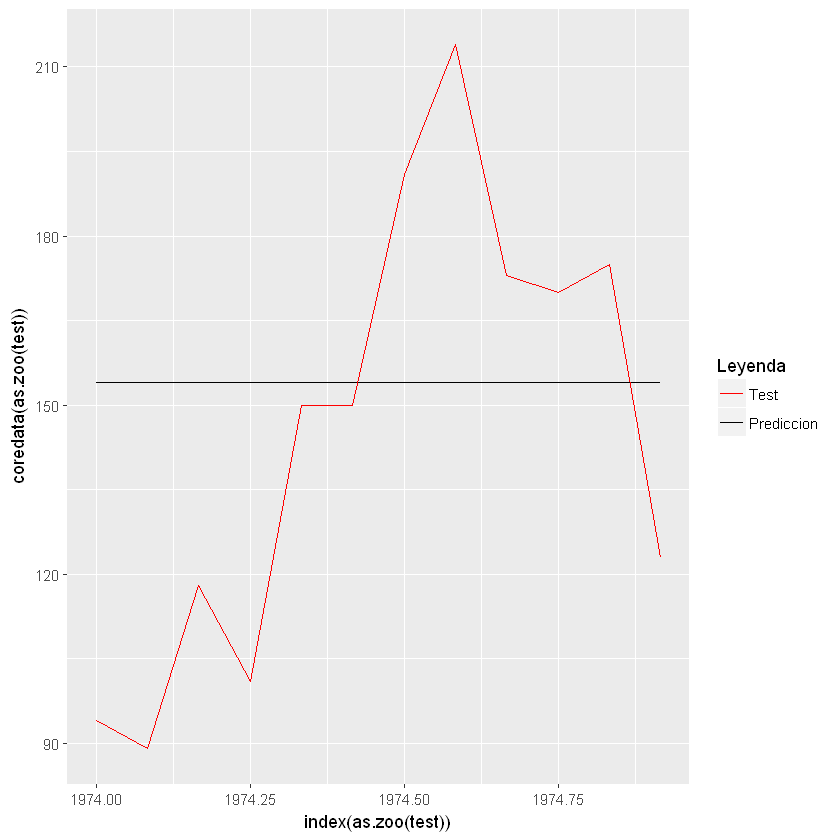

In [98]:
combine(model.2$mean, acc.test)

In [99]:
accuracy(f = model.2, x = acc.test) # 33.83333

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.5568862,27.64694,22.16168,-2.030101,18.18006,1.249448,-0.09178492,NA
Test set,-8.3333333,39.73873,33.83333,-14.215022,27.51561,1.907481,0.63105182,1.356633



	Ljung-Box test

data:  Residuals from Naive method
Q* = 163.84, df = 24, p-value < 2.2e-16

Model df: 0.   Total lags used: 24



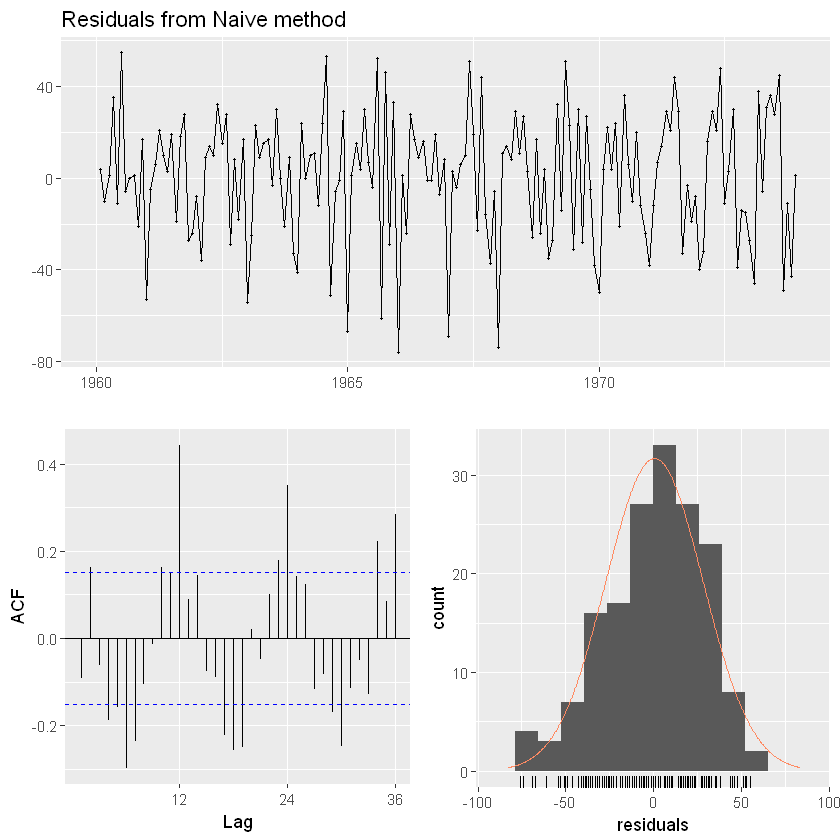

In [100]:
checkresiduals(model.2)

<br>

### Modelo ingenuo en el que se predice con el valor anterior observado con constante != 0

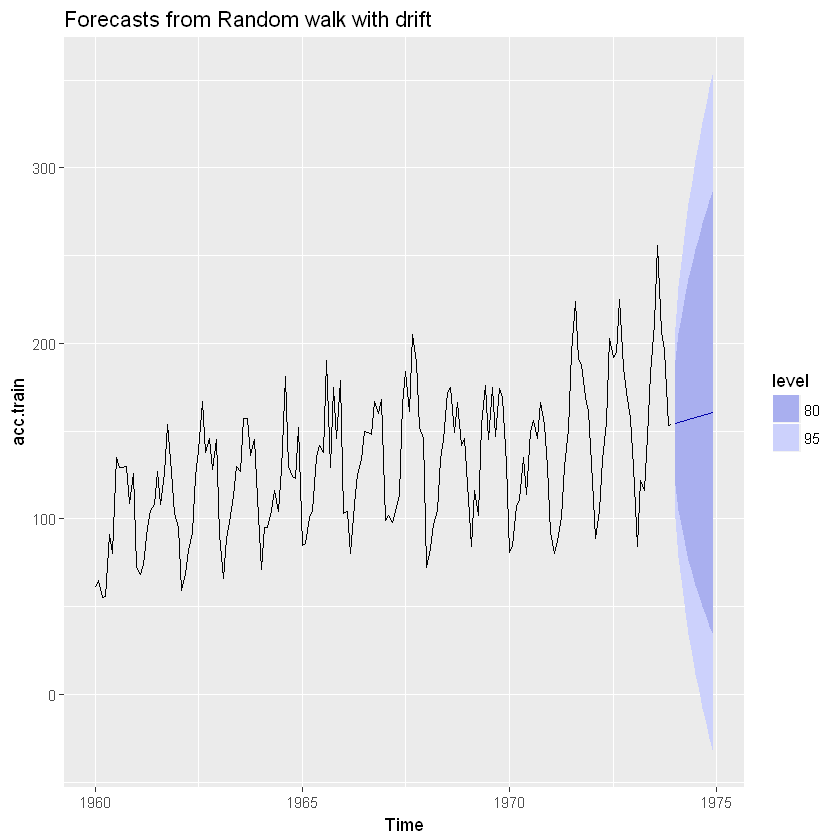

In [101]:
model.3 <- rwf(y = acc.train, h = 12, drift = TRUE)
autoplot(model.3)

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


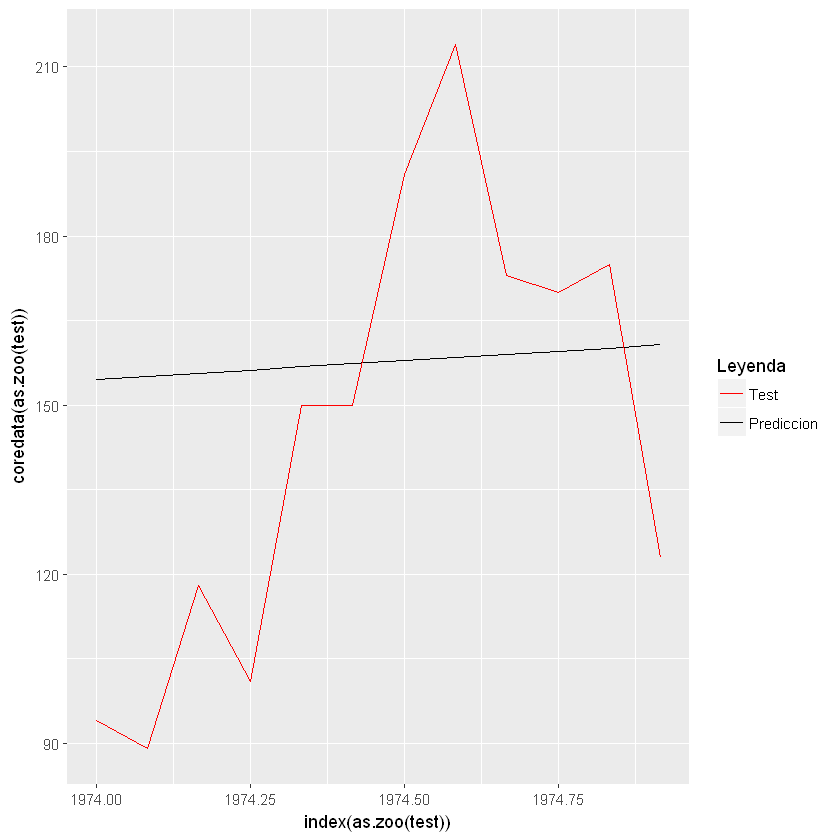

In [102]:
combine(model.3$mean, acc.test)

In [103]:
accuracy(f = model.3, x = acc.test) # 33.27645

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.382040e-15,27.64133,22.09832,-2.494433,18.14887,1.245876,-0.09178492,NA
Test set,-1.195309e+01,39.51151,33.27645,-16.613199,27.61444,1.876084,0.61278154,1.373421



	Ljung-Box test

data:  Residuals from Random walk with drift
Q* = 163.84, df = 23, p-value < 2.2e-16

Model df: 1.   Total lags used: 24



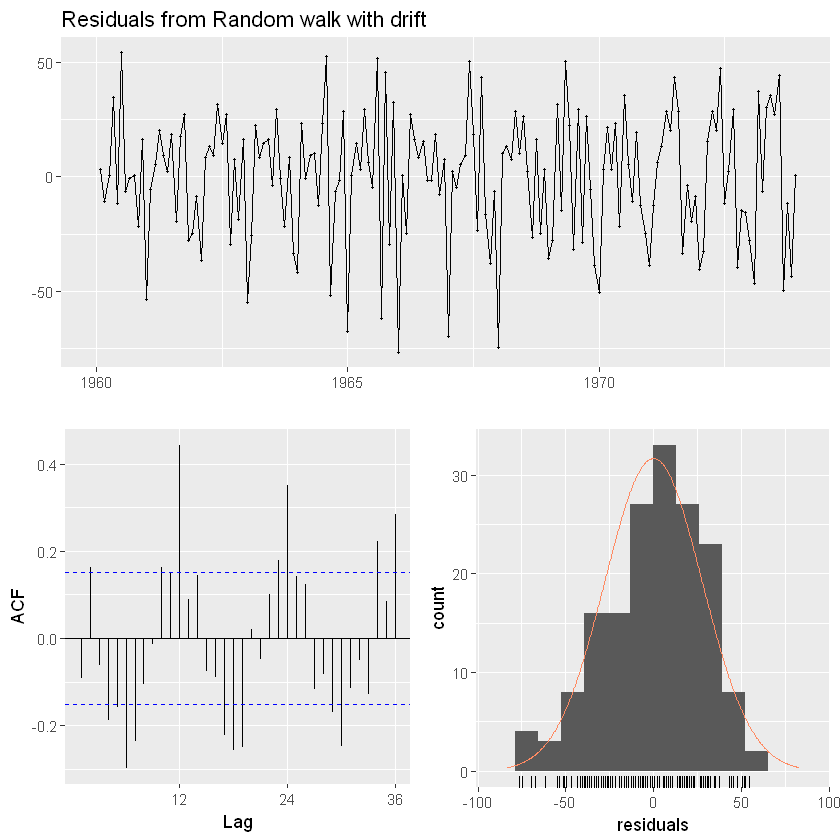

In [104]:
checkresiduals(model.3) # No son ruido blanco

<br>

### Modelo ingenuo que tiene en cuenta la estacionalidad

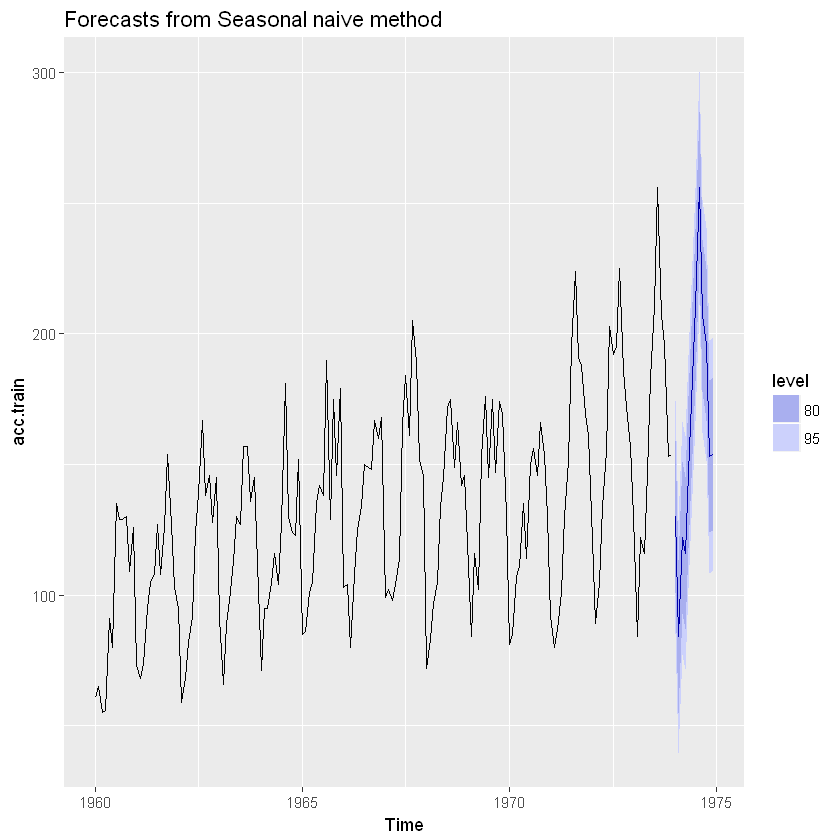

In [105]:
model.4 <- snaive(y = acc.train, h = 12)
autoplot(model.4)

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


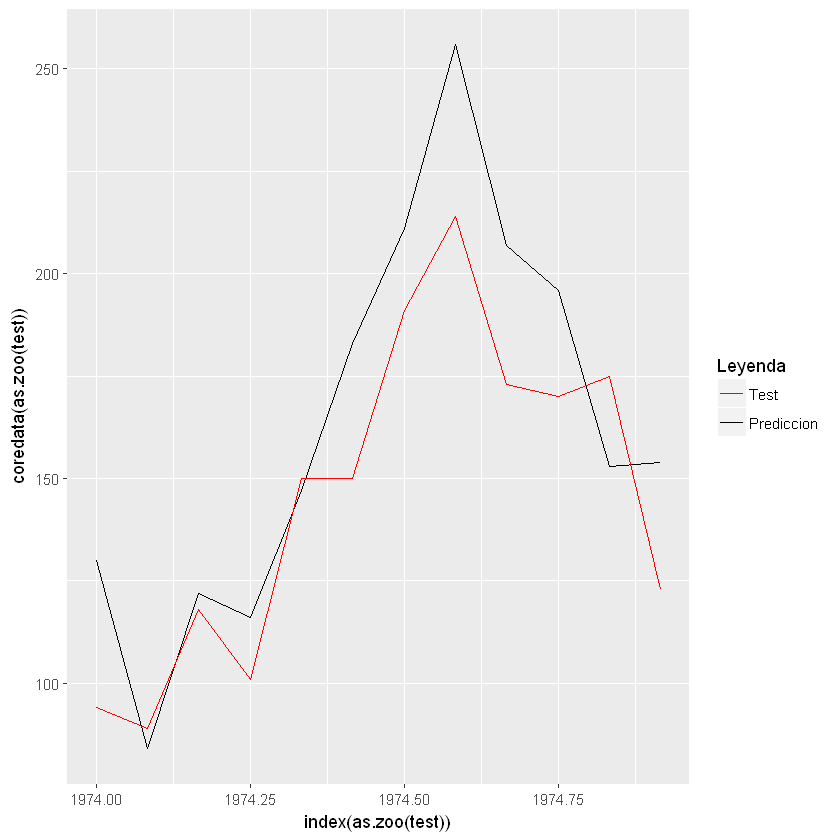

In [106]:
combine(model.4$mean, acc.test)

In [107]:
accuracy(f = model.4, x = acc.test) # 22.58333

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,5.083333,22.73608,17.73718,2.63632,13.39306,1.00000,0.2149960,NA
Test set,-17.583333,25.98237,22.58333,-12.38314,15.74804,1.27322,-0.1291698,0.6326959



	Ljung-Box test

data:  Residuals from Seasonal naive method
Q* = 67.02, df = 24, p-value = 6.124e-06

Model df: 0.   Total lags used: 24



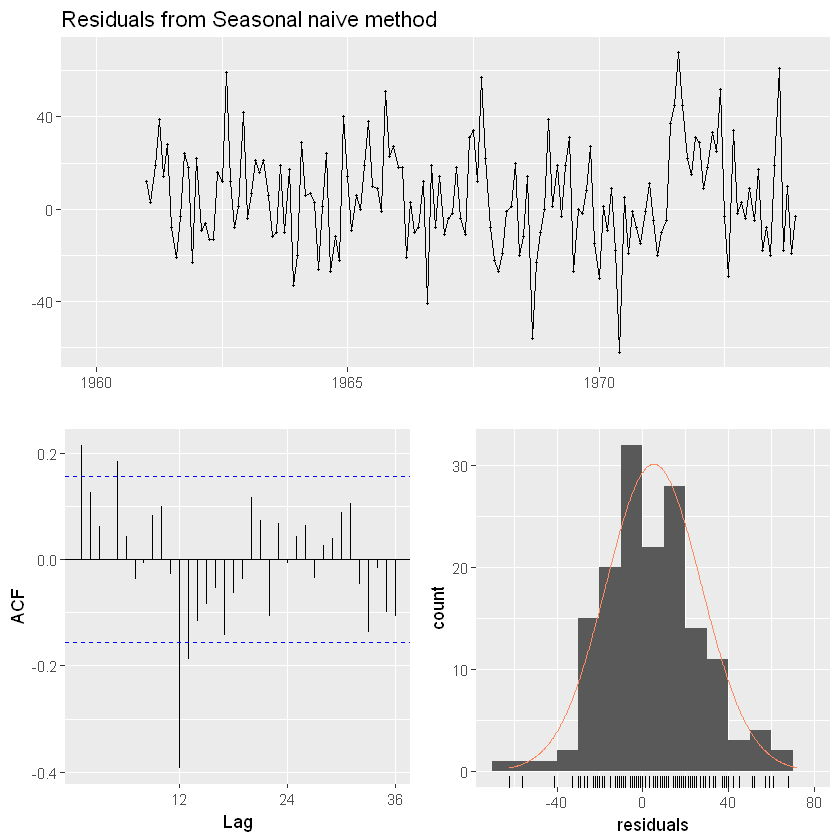

In [108]:
checkresiduals(model.4) # No son ruido blanco

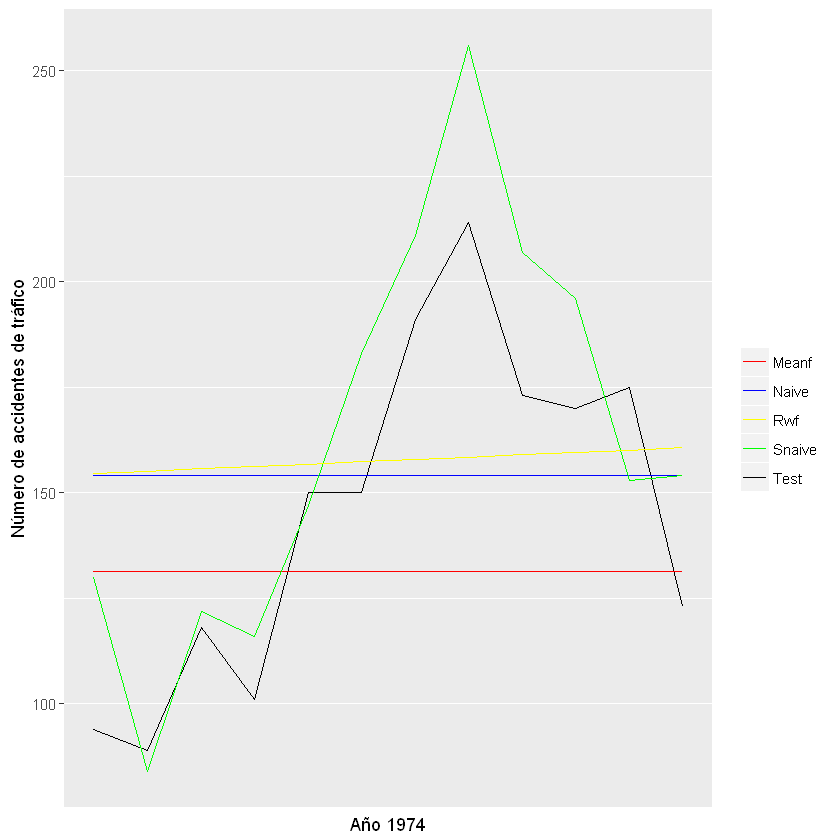

In [109]:
# Plotting de todos los modelos ingenuos
p <- ggplot() +
  geom_line(aes(x = index(as.zoo(acc.test)), y = coredata(as.zoo(acc.test)), colour = 'Test')) +
  geom_line(aes(x = index(as.zoo(acc.test)), y = model.1$mean, colour = 'Meanf')) +
  geom_line(aes(x = index(as.zoo(acc.test)), y = model.2$mean, colour = 'Naive')) +
  geom_line(aes(x = index(as.zoo(acc.test)), y = model.4$mean, colour = 'Snaive')) +
  geom_line(aes(x = index(as.zoo(acc.test)), y = model.3$mean, colour = 'Rwf')) +
  scale_color_manual(name = '', values = c('Test' = 'black',
                                           'Meanf' = 'red', 'Naive' = 'blue', 'Snaive' = 'green',
                                           'Rwf' = 'yellow'),
                     labels = c('Meanf','Naive', 'Rwf', 'Snaive', 'Test')) +
  ylab('Número de accidentes de tráfico') + xlab('Año 1974') +
  scale_x_continuous(breaks = c(), labels = c())
p

<br>

#### Ajuste de un modelo lineal con tendencia y estacionalidad a los datos

In [111]:
model <- tslm(formula  = acc.train ~ trend + season)
class(model)

[1] "lm"

In [112]:
model


Call:
tslm(formula = acc.train ~ trend + season)

Coefficients:
(Intercept)        trend      season2      season3      season4      season5  
   63.75229      0.35485     -9.99771     -0.06685      8.72115     31.43773  
    season6      season7      season8      season9     season10     season11  
   46.36859     62.72802     78.80174     64.44689     69.09203     51.02289  
   season12  
   47.88233  


In [113]:
pred <- forecast(object = model, h = 12)
pred

         Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
Jan 1974       123.7225 100.27096 147.1741  87.72829 159.7168
Feb 1974       114.0797  90.62811 137.5312  78.08544 150.0739
Mar 1974       124.3654 100.91382 147.8169  88.37115 160.3596
Apr 1974       133.5082 110.05668 156.9598  97.51401 169.5025
May 1974       156.5797 133.12811 180.0312 120.58544 192.5739
Jun 1974       171.8654 148.41382 195.3169 135.87115 207.8596
Jul 1974       188.5797 165.12811 212.0312 152.58544 224.5739
Aug 1974       205.0082 181.55668 228.4598 169.01401 241.0025
Sep 1974       191.0082 167.55668 214.4598 155.01401 227.0025
Oct 1974       196.0082 172.55668 219.4598 160.01401 232.0025
Nov 1974       178.2940 154.84239 201.7455 142.29972 214.2882
Dec 1974       175.5082 152.05668 198.9598 139.51401 211.5025

In [114]:
class(pred)

[1] "forecast"

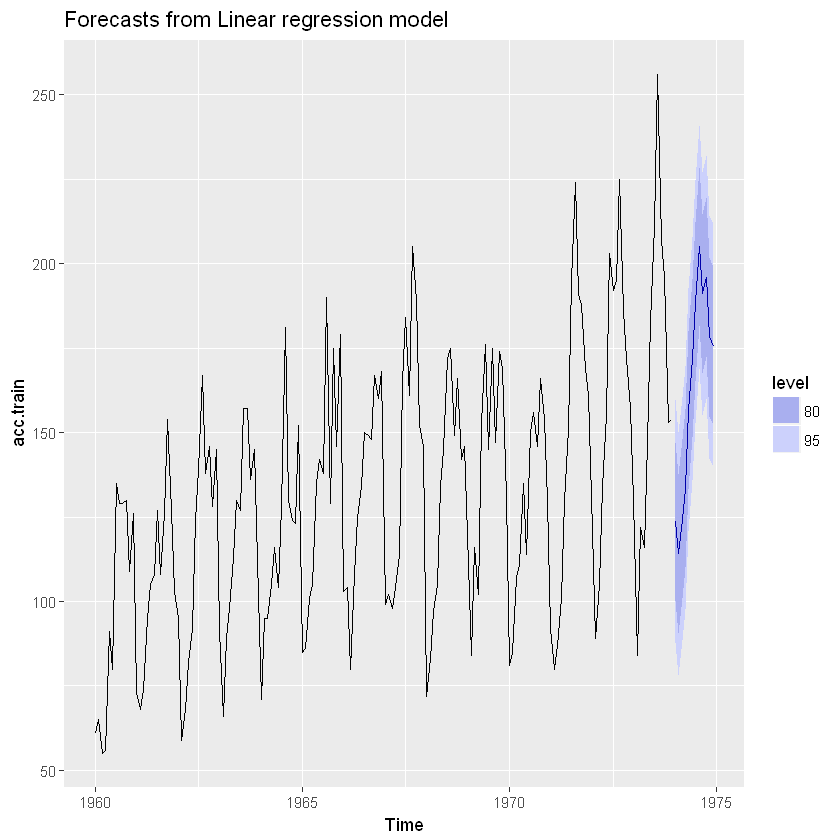

In [115]:
autoplot(pred)

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


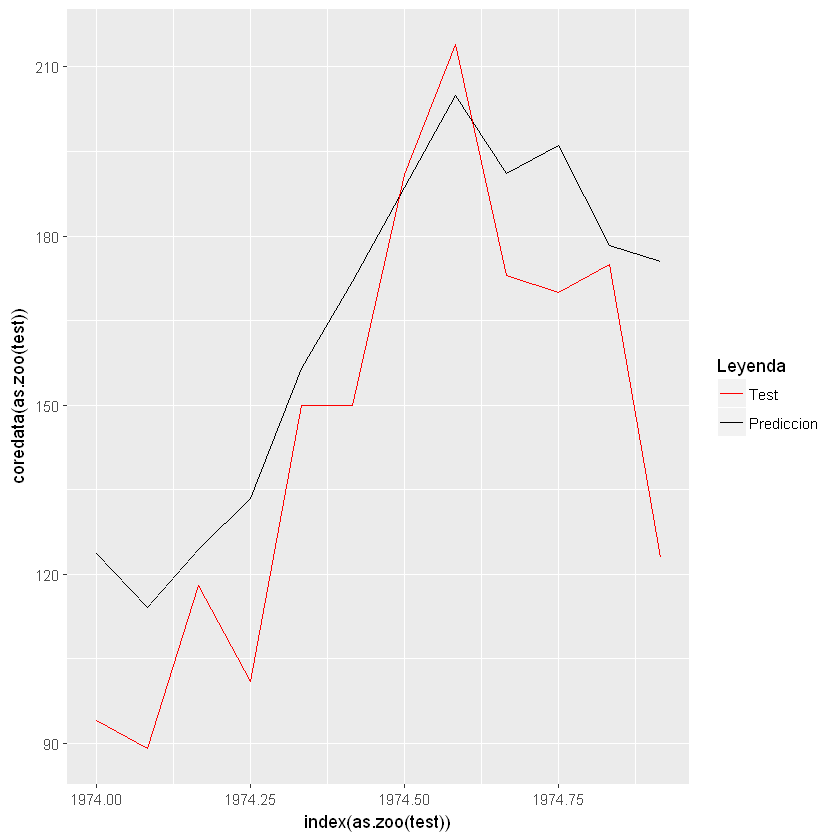

In [116]:
combine(pred$mean, acc.test)

In [117]:
accuracy(f = pred, x = acc.test) # 19.44597

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-5.915820e-16,16.74843,13.22338,-1.44082,10.6025,0.7455175,0.2861346,NA
Test set,-1.754396e+01,24.12901,19.44597,-15.09621,16.0077,1.0963395,-0.1685237,0.7191841



	Breusch-Godfrey test for serial correlation of order up to 24

data:  Residuals from Linear regression model
LM test = 40.029, df = 24, p-value = 0.02123



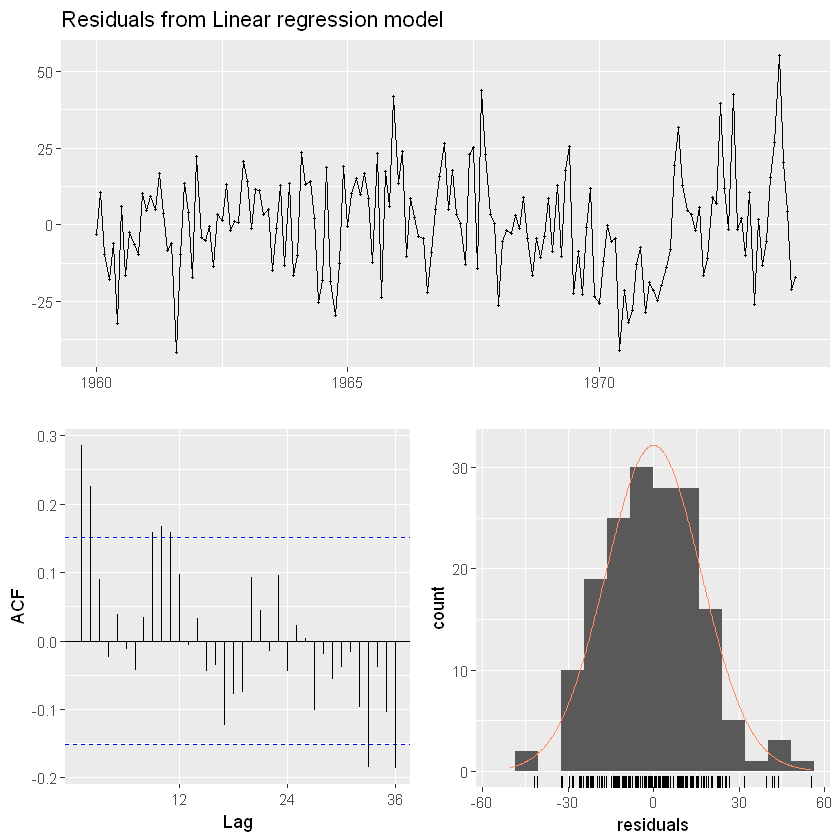

In [118]:
checkresiduals(model) # No son ruido blanco

<br>

####  Damped HoltWinters Aditivo

In [127]:
model.adit <- hw(y = acc.train, h = 12, damped = TRUE, seasonal = 'additive',
            initial = 'optimal') 
summary(model.adit)


Forecast method: Damped Holt-Winters' additive method

Model Information:
Damped Holt-Winters' additive method 

Call:
 hw(y = acc.train, h = 12, seasonal = "additive", damped = TRUE,  

 Call:
     initial = "optimal") 

  Smoothing parameters:
    alpha = 0.1554 
    beta  = 1e-04 
    gamma = 1e-04 
    phi   = 0.98 

  Initial states:
    l = 96.756 
    b = 0.9626 
    s=12.2488 15.3994 32.0652 26.1953 39.3466 23.8066
           10.2433 -7.4994 -27.8994 -37.4982 -48.5355 -37.8727

  sigma:  16.6449

     AIC     AICc      BIC 
1841.693 1846.284 1897.925 

Error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.7614963 16.64493 12.92584 -0.7276908 10.16514 0.7287425
                  ACF1
Training set 0.1495718

Forecasts:
         Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
Jan 1974       124.4986 103.16726 145.8299  91.87514 157.1221
Feb 1974       113.8763  92.28843 135.4641  80.86052 146.8920
Mar 1974       124.9507 103.10

In [128]:
summary(model.adit)


Forecast method: Damped Holt-Winters' additive method

Model Information:
Damped Holt-Winters' additive method 

Call:
 hw(y = acc.train, h = 12, seasonal = "additive", damped = TRUE,  

 Call:
     initial = "optimal") 

  Smoothing parameters:
    alpha = 0.1554 
    beta  = 1e-04 
    gamma = 1e-04 
    phi   = 0.98 

  Initial states:
    l = 96.756 
    b = 0.9626 
    s=12.2488 15.3994 32.0652 26.1953 39.3466 23.8066
           10.2433 -7.4994 -27.8994 -37.4982 -48.5355 -37.8727

  sigma:  16.6449

     AIC     AICc      BIC 
1841.693 1846.284 1897.925 

Error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.7614963 16.64493 12.92584 -0.7276908 10.16514 0.7287425
                  ACF1
Training set 0.1495718

Forecasts:
         Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
Jan 1974       124.4986 103.16726 145.8299  91.87514 157.1221
Feb 1974       113.8763  92.28843 135.4641  80.86052 146.8920
Mar 1974       124.9507 103.10

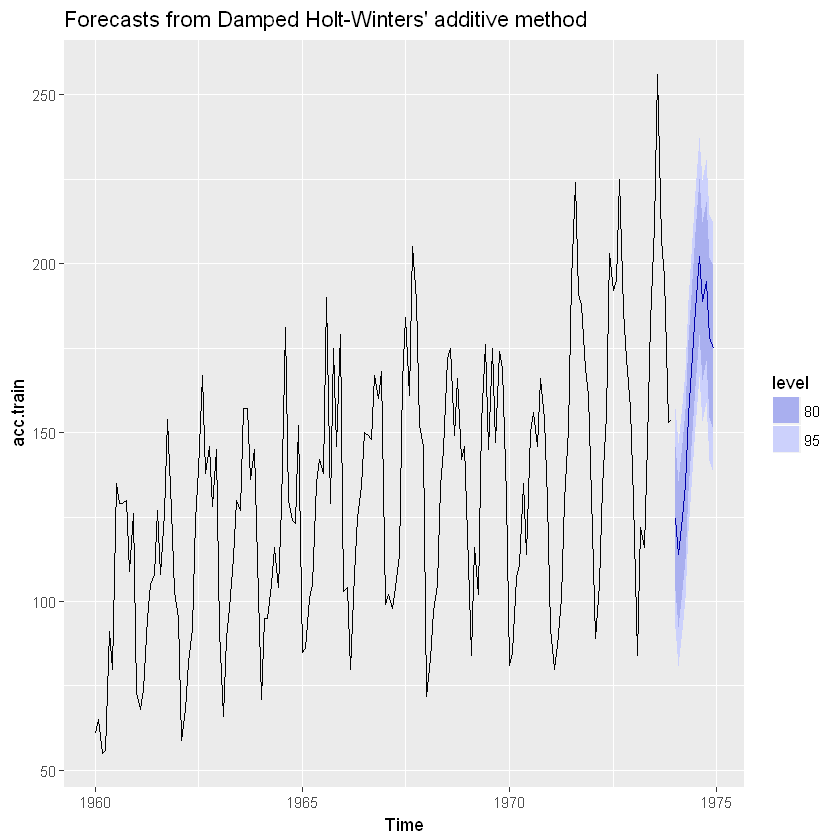

In [129]:
autoplot(model.adit)

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


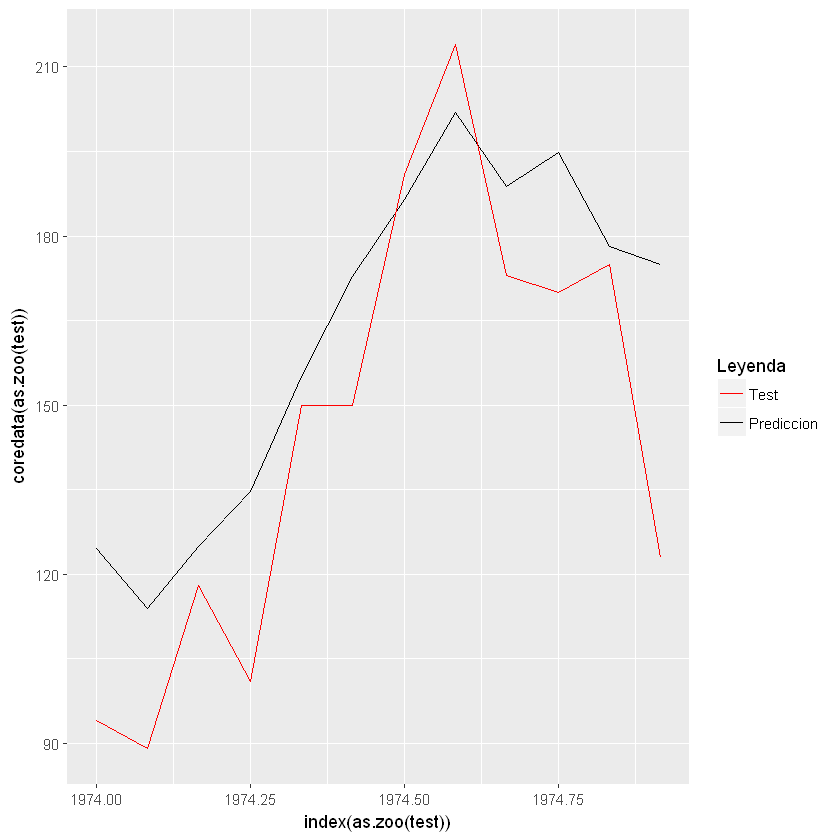

In [131]:
combine(model.adit$mean, acc.test)

In [132]:
accuracy(f = model.adit, x = acc.test) # 19.67722

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.7614963,16.64493,12.92584,-0.7276908,10.16514,0.7287425,0.1495718,NA
Test set,-16.9085766,24.18036,19.67722,-14.8238786,16.16072,1.1093768,-0.1338591,0.7216315



	Ljung-Box test

data:  Residuals from Damped Holt-Winters' additive method
Q* = 42.108, df = 7, p-value = 4.958e-07

Model df: 17.   Total lags used: 24



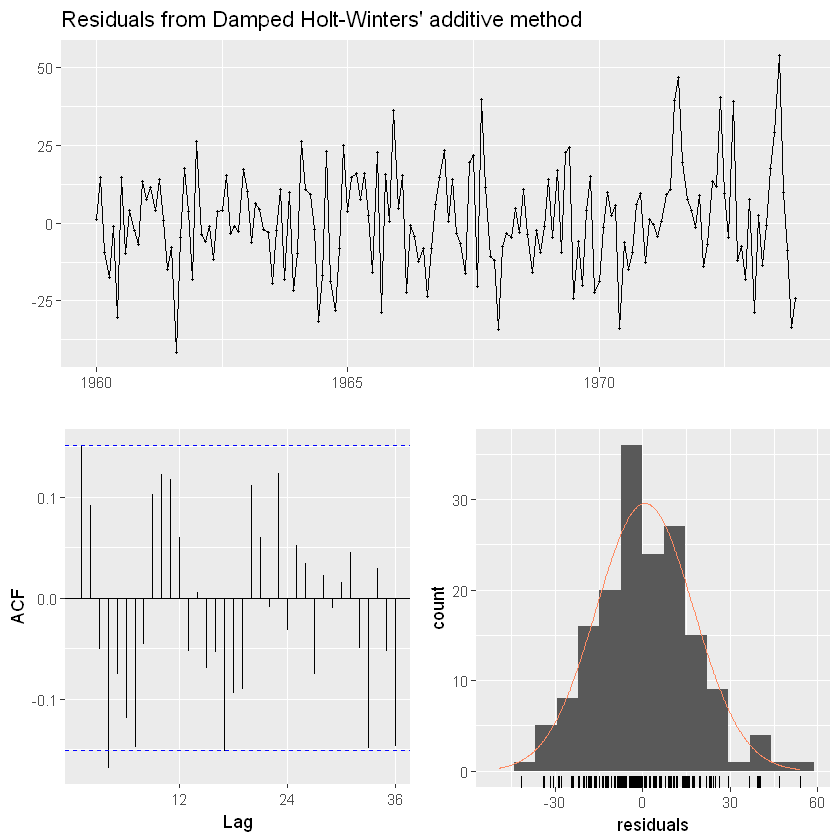

In [133]:
checkresiduals(model.adit) # No son ruido blanco

<br>

### Damped HoltWinters Multiplicativo

In [135]:
model.mult <- hw(y = acc.train, h = 12, damped = TRUE, seasonal = 'multiplicative',
            initial = 'optimal')
class(model.mult)

[1] "forecast"

In [136]:
summary(model.mult)


Forecast method: Damped Holt-Winters' multiplicative method

Model Information:
Damped Holt-Winters' multiplicative method 

Call:
 hw(y = acc.train, h = 12, seasonal = "multiplicative", damped = TRUE,  

 Call:
     initial = "optimal") 

  Smoothing parameters:
    alpha = 0.1708 
    beta  = 1e-04 
    gamma = 1e-04 
    phi   = 0.9623 

  Initial states:
    l = 91.5624 
    b = 1.1674 
    s=1.0753 1.0927 1.2404 1.219 1.3265 1.1952
           1.08 0.9561 0.7764 0.7078 0.622 0.7086

  sigma:  0.1213

     AIC     AICc      BIC 
1810.221 1814.812 1866.452 

Error measures:
                   ME     RMSE      MAE        MPE     MAPE      MASE
Training set 1.113903 16.03383 12.68223 -0.4267724 9.854084 0.7150085
                   ACF1
Training set 0.08131717

Forecasts:
         Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
Jan 1974       112.4506  94.97204 129.9293  85.71942 139.1819
Feb 1974        98.7101  83.14161 114.2786  74.90015 122.5201
Mar 1974       112.3351  94.36

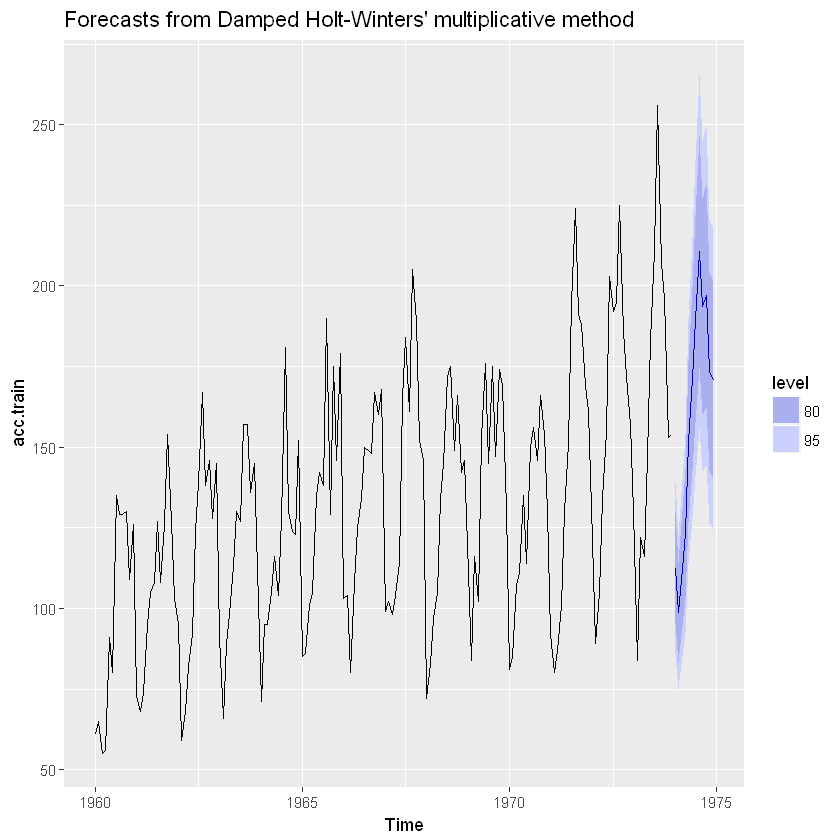

In [137]:
autoplot(model.mult)

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


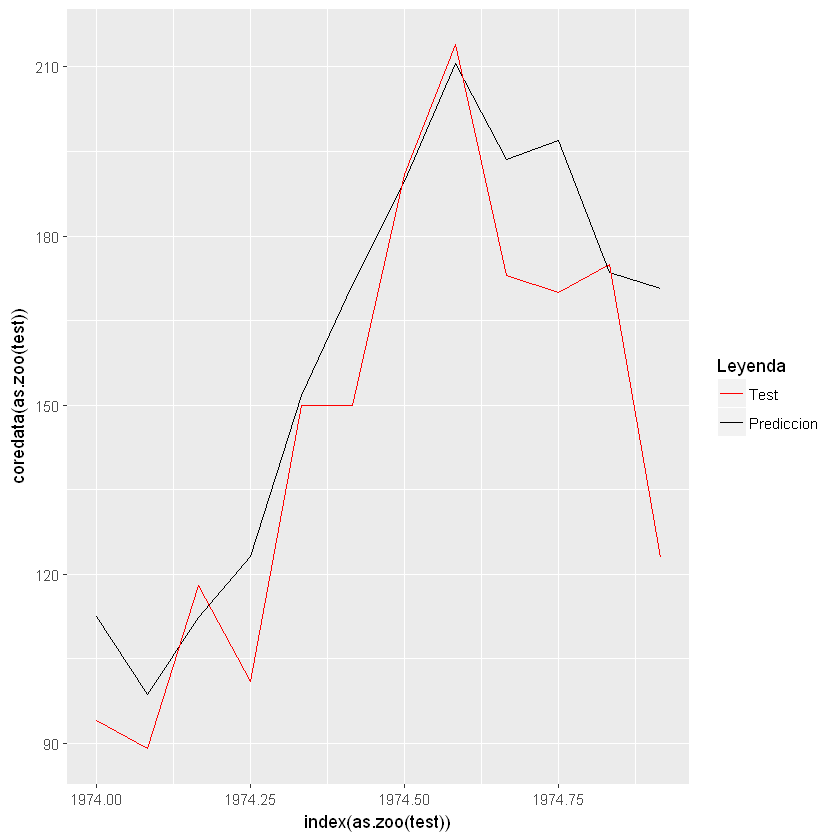

In [138]:
combine(model.mult$mean, acc.test)

In [139]:
accuracy(f = model.mult, x = acc.test) # 15.04762

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,1.113903,16.03383,12.68223,-0.4267724,9.854084,0.7150085,0.08131717,NA
Test set,-13.063209,20.12153,15.04762,-10.5419375,11.866680,0.8483659,-0.33286407,0.5553684



	Ljung-Box test

data:  Residuals from Damped Holt-Winters' multiplicative method
Q* = 30.474, df = 7, p-value = 7.771e-05

Model df: 17.   Total lags used: 24



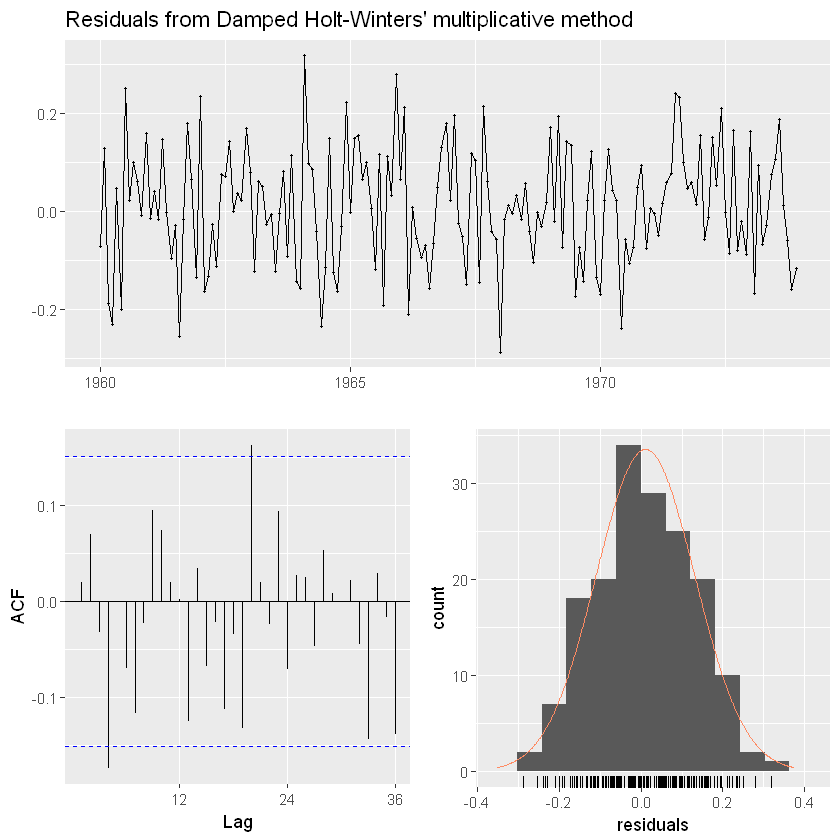

In [140]:
checkresiduals(model.mult) # No son ruido blanco

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


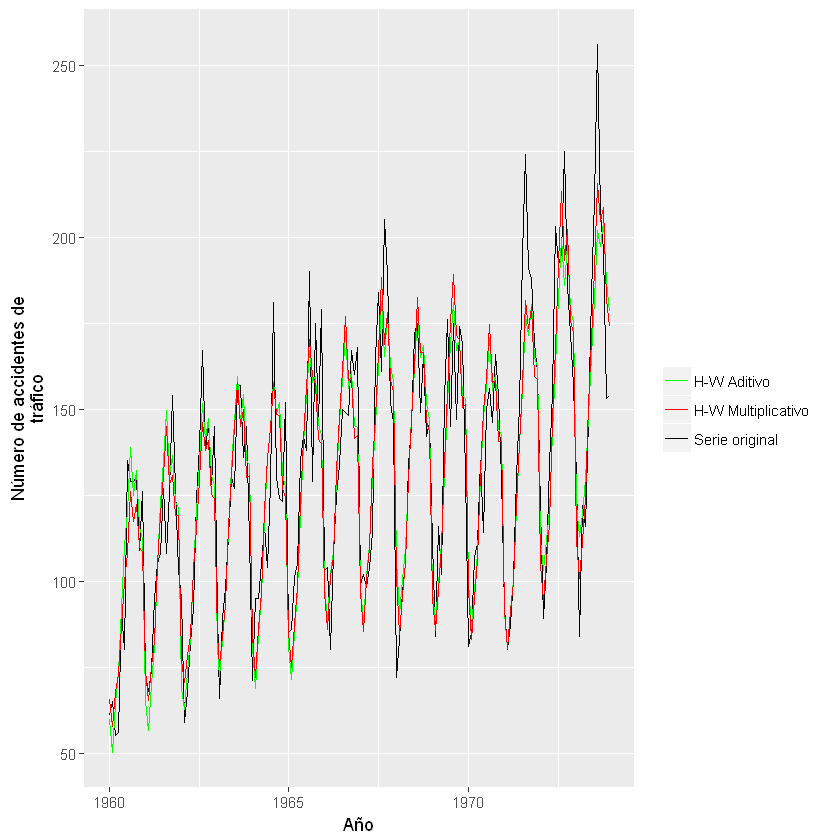

In [142]:
p.1 <- ggplot() +
  geom_line(aes(x = index(as.zoo(acc.train)),
                y = coredata(as.zoo(acc.train)), colour = 'Serie original')) +
  geom_line(aes(x = index(as.zoo(fitted(model.adit))),
                y = coredata(as.zoo(fitted(model.adit))), colour = 'H-W Aditivo')) +
  geom_line(aes(x = index(as.zoo(fitted(model.mult))),
                y = coredata(as.zoo(fitted(model.mult))), colour = 'H-W Multiplicativo')) +
  scale_color_manual(name = '', values = c('Serie original' = 'black', 'H-W Multiplicativo' = 'red',
                                           'H-W Aditivo' = 'green'),
                     labels = c('H-W Aditivo','H-W Multiplicativo','Serie original')) +
  xlab('Año') + ylab('Número de accidentes de\ntráfico')
p.1

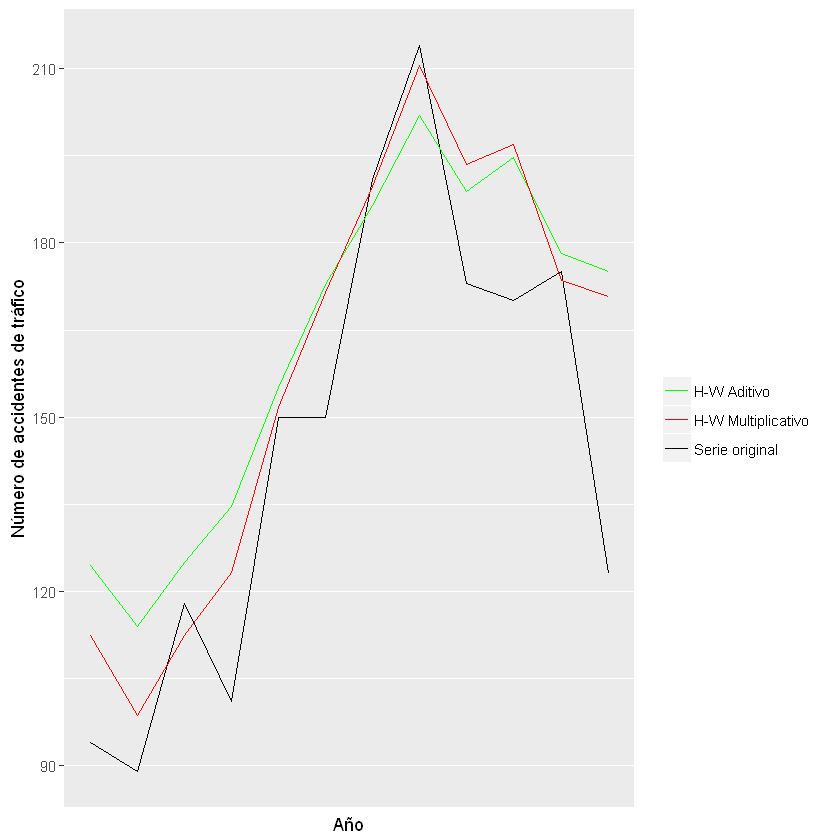

In [143]:
p.2 <- ggplot() +
  geom_line(aes(x = index(as.zoo(acc.test)), y = coredata(as.zoo(acc.test)), colour = 'Serie original')) +
  geom_line(aes(x = index(as.zoo(acc.test)), y = model.adit$mean, colour = 'H-W Aditivo')) +
  geom_line(aes(x = index(as.zoo(acc.test)), y = model.mult$mean, colour = 'H-W Multiplicativo')) +
  scale_color_manual(name = '', values = c('Serie original' = 'black', 'H-W Multiplicativo' = 'red',
                                           'H-W Aditivo' = 'green'),
                     labels = c('H-W Aditivo','H-W Multiplicativo','Serie original')) +
  xlab('Año') + ylab('Número de accidentes de tráfico') + scale_x_continuous(breaks = c(), labels = c())
p.2

<br>

### Red neuronal por defecto

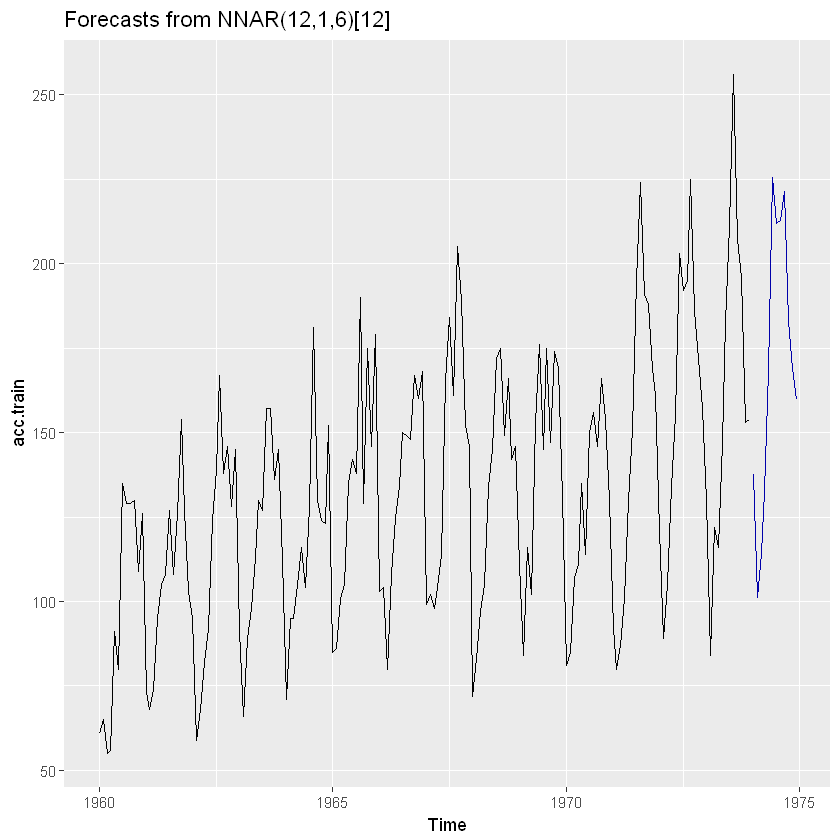

In [147]:
# (Las medidas de precisión pueden variar debido al caracter aleatorio de las redes neuronales)
model <- nnetar(y = acc.train)
pred <- forecast(object = model, h = 12)
autoplot(pred)

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


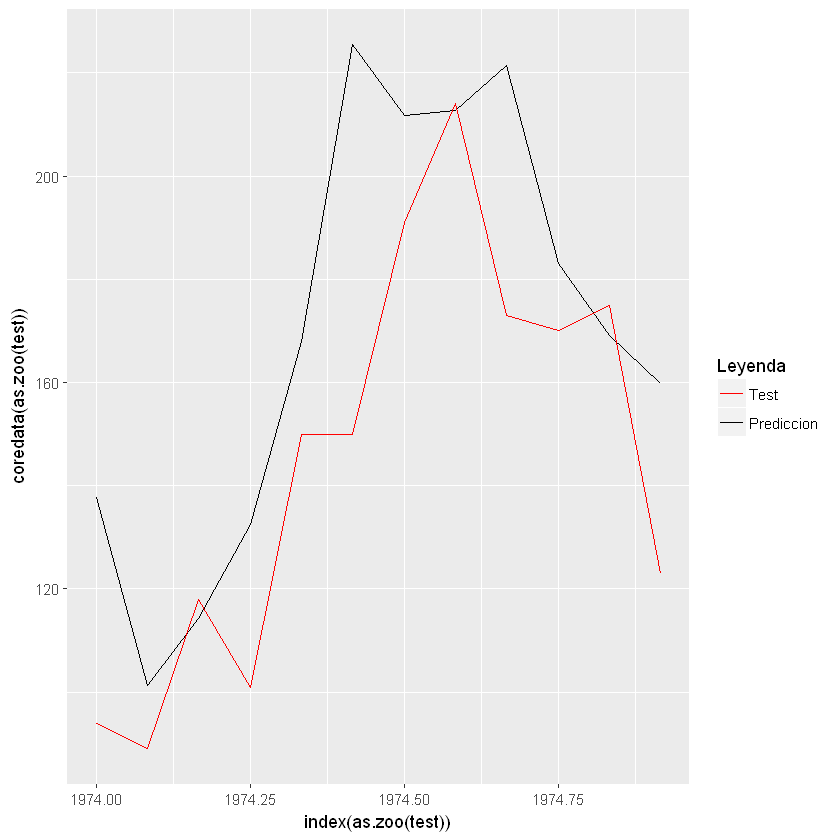

In [148]:
combine(pred$mean, acc.test)

In [149]:
accuracy(pred, acc.test) # 25.... Overfitting

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.001391312,4.172015,3.209183,-0.391049,2.568717,0.1809297,0.05736933,NA
Test set,-24.070650374,33.437444,25.904128,-18.577827,19.775427,1.4604423,-0.23053641,0.9247553


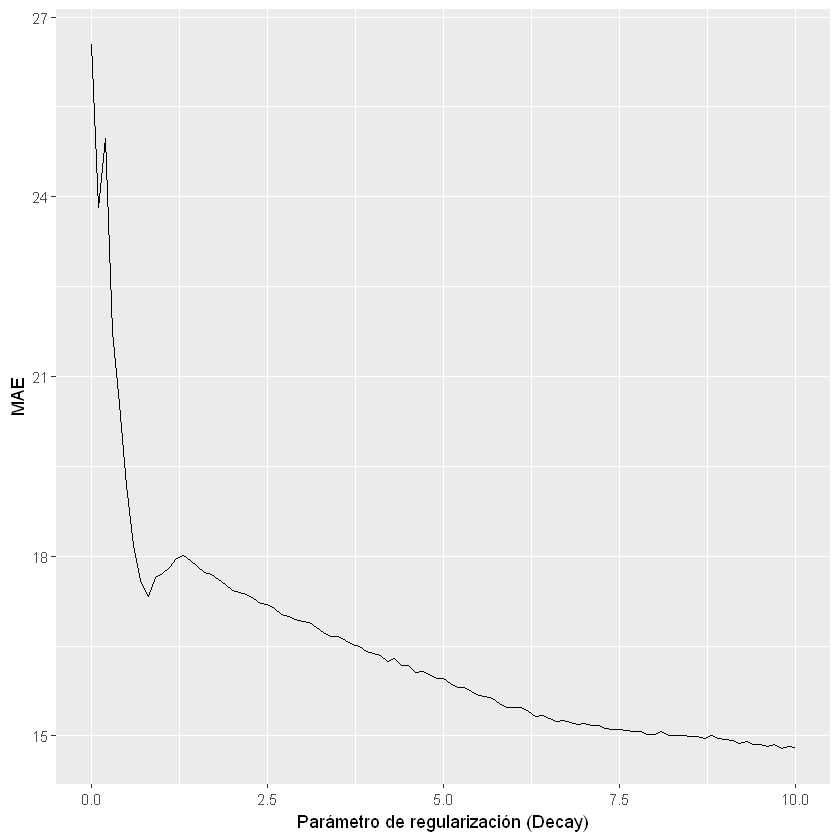

In [150]:
# Estudiamos el decay
library(Metrics)

metrics.decay <- c()
 for (i in seq(0, 10, 0.1)) {
  model <- nnetar(acc.train, decay = i)
  pred <- forecast(model, h = 12)
  metrics.decay <- c(metrics.decay, mae(pred$mean, acc.test))
}

m.decay <- data.frame(decay = seq(0, 10, 0.1), MAE = metrics.decay)

comp <- ggplot() +
  geom_line(data = m.decay, aes(x = decay, y = MAE)) +
  xlab('Parámetro de regularización (Decay)') + ylab('MAE')
comp

<br>

### Red Neuronal personalizada 1

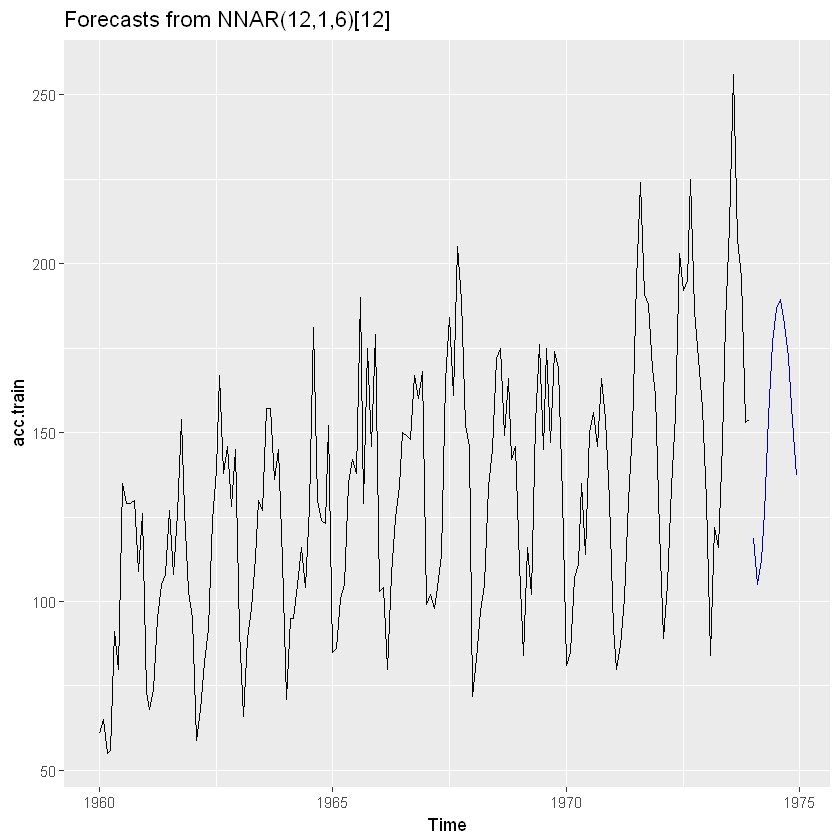

In [152]:
model <- nnetar(y = acc.train, decay = 9.5)
pred <- forecast(object = model, h = 12)
autoplot(pred)

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


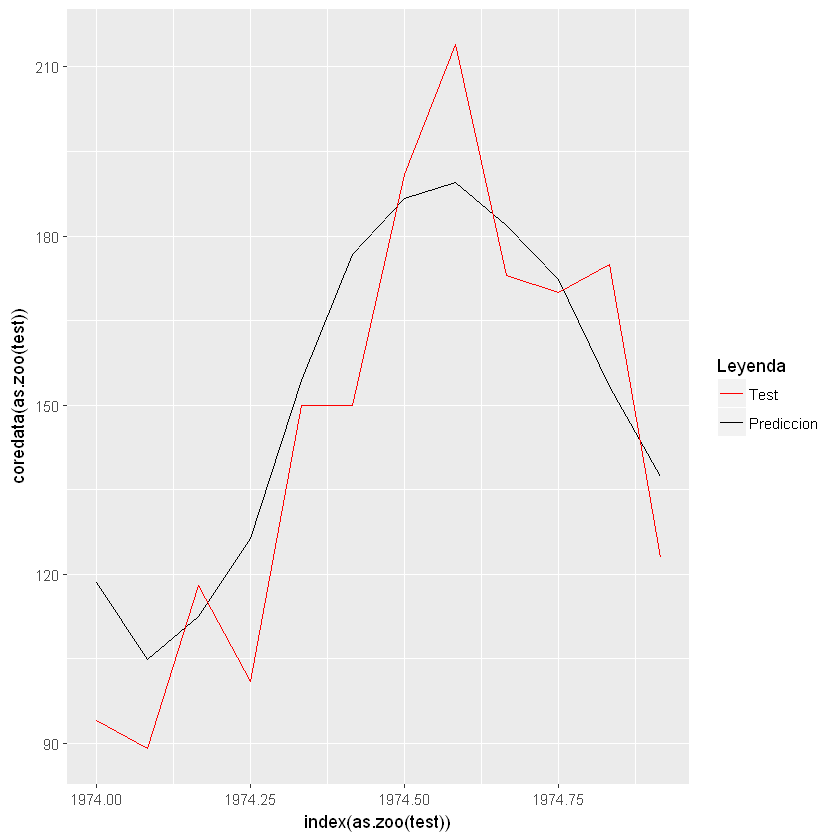

In [153]:
combine(pred$mean, acc.test)

In [154]:
accuracy(f = pred, x = acc.test) # 14....

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.01802025,19.85612,15.52057,-3.586715,12.60554,0.8750304,0.2174749,NA
Test set,-5.51354801,17.43106,14.88109,-6.421046,11.56783,0.8389774,-0.1100693,0.5161744


<br>

### Red personalizada 2

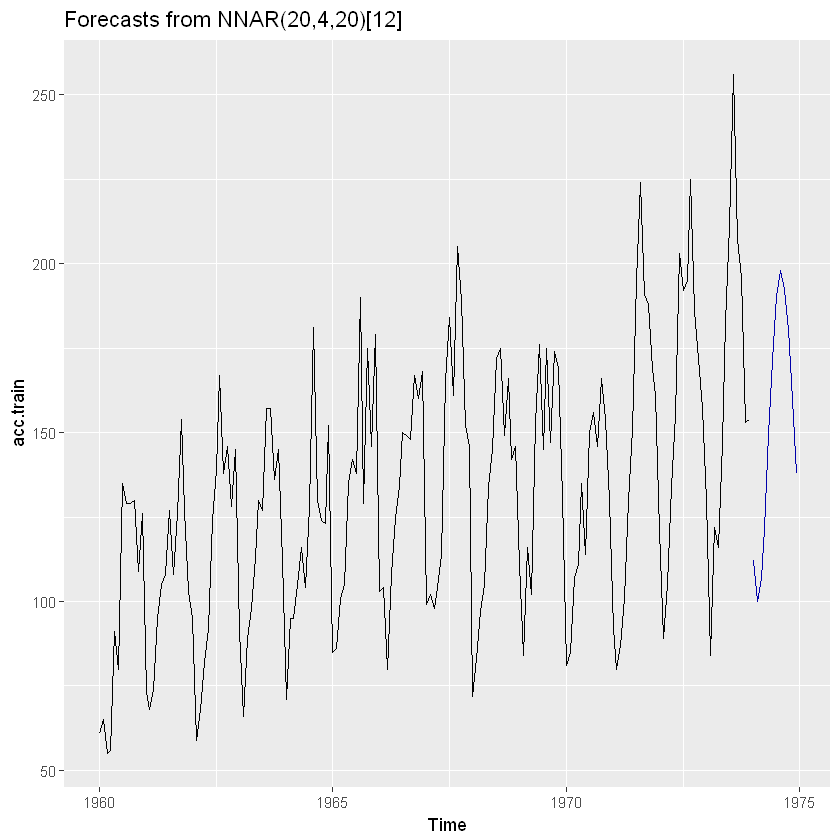

In [155]:
model <- nnetar(y = acc.train, repeats = 25, size = 20, decay = 9.5, p = 20, P = 4)
pred <- forecast(object = model, h = 12)
autoplot(pred)

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


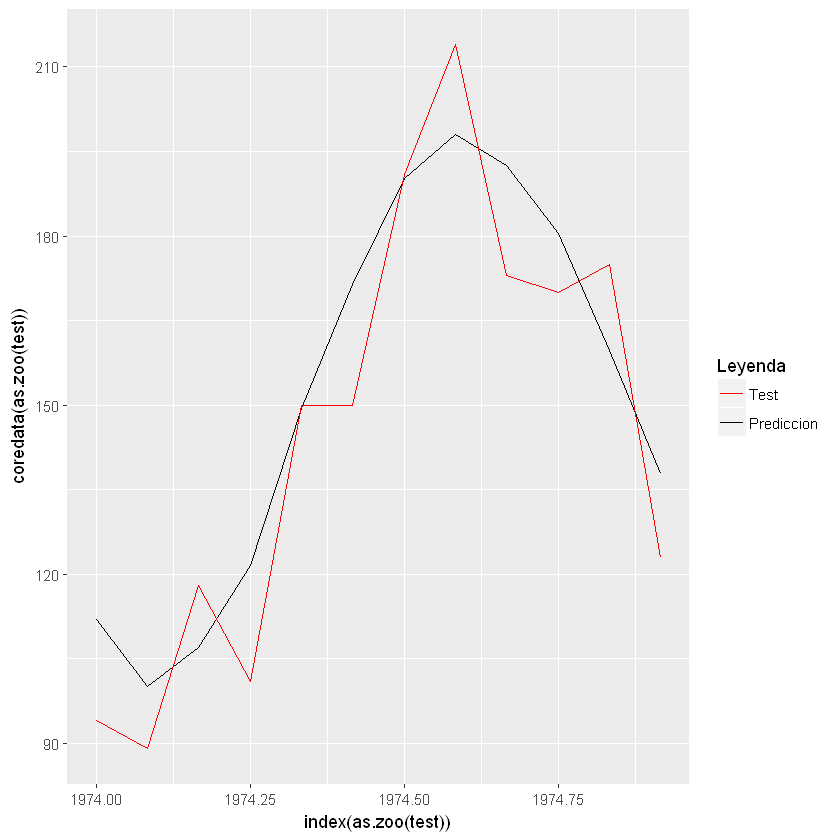

In [157]:
combine(pred$mean, acc.test)

In [158]:
accuracy(f = pred, x = acc.test) # 13....

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.001636861,19.34075,15.19040,-2.906950,11.53253,0.8564157,0.1841328,NA
Test set,-5.995673060,14.84318,13.28187,-5.765004,10.16103,0.7488150,-0.4257883,0.4428228


<br>

## Técnicas ARIMA

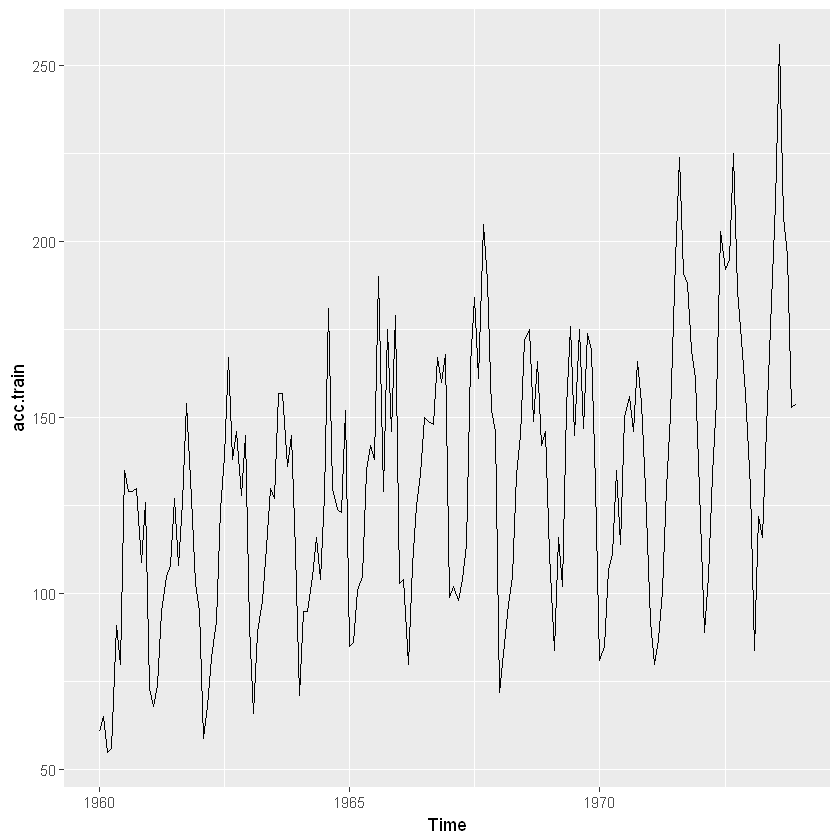

In [159]:
autoplot(acc.train)

### Ajustamos la varianza con log y Box-Cox

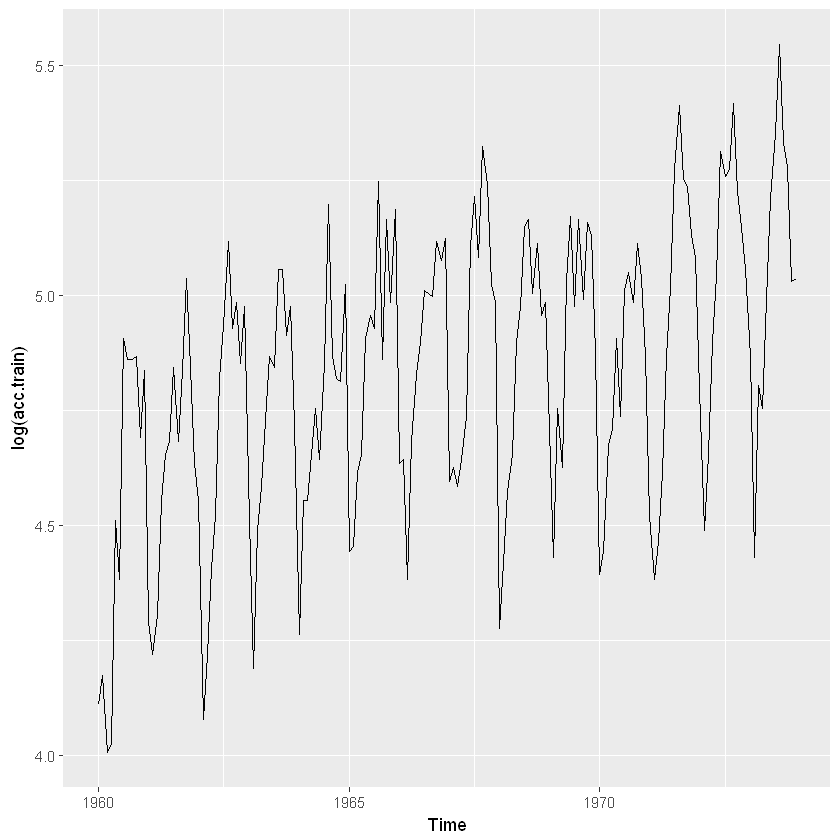

In [160]:
autoplot(log(acc.train))

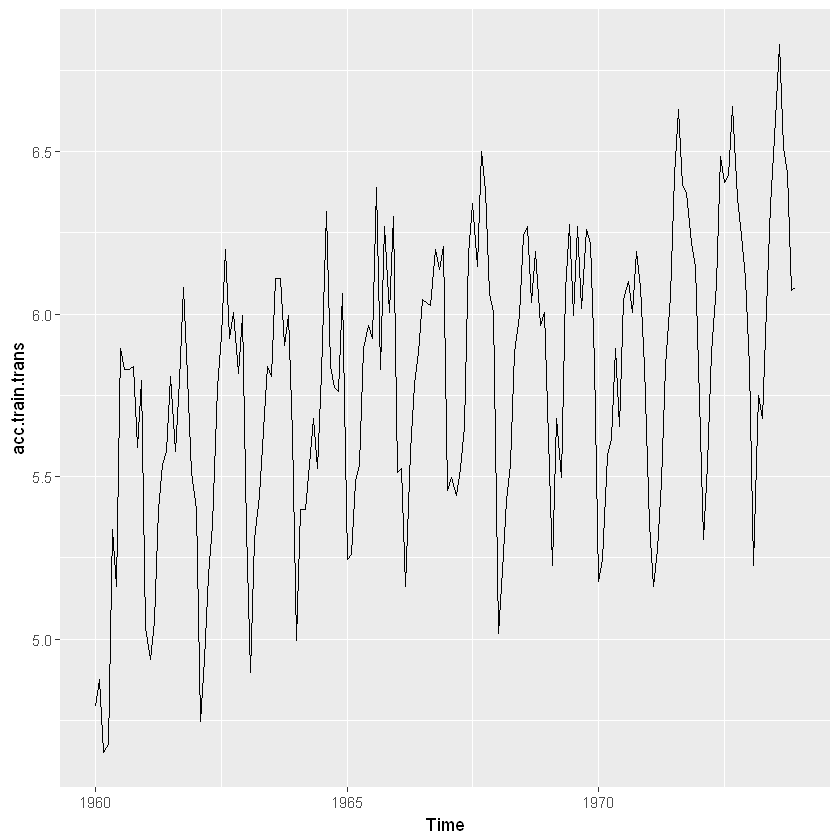

In [161]:
acc.train.trans <- BoxCox(x = acc.train, lambda = BoxCox.lambda(x = acc.train))
autoplot(acc.train.trans)

<br>

### ¿Nuestra serie es estacionaria?

In [165]:
ndiffs(acc.train) # 1 

[1] 1

In [166]:
nsdiffs(acc.train) # 0

[1] 0

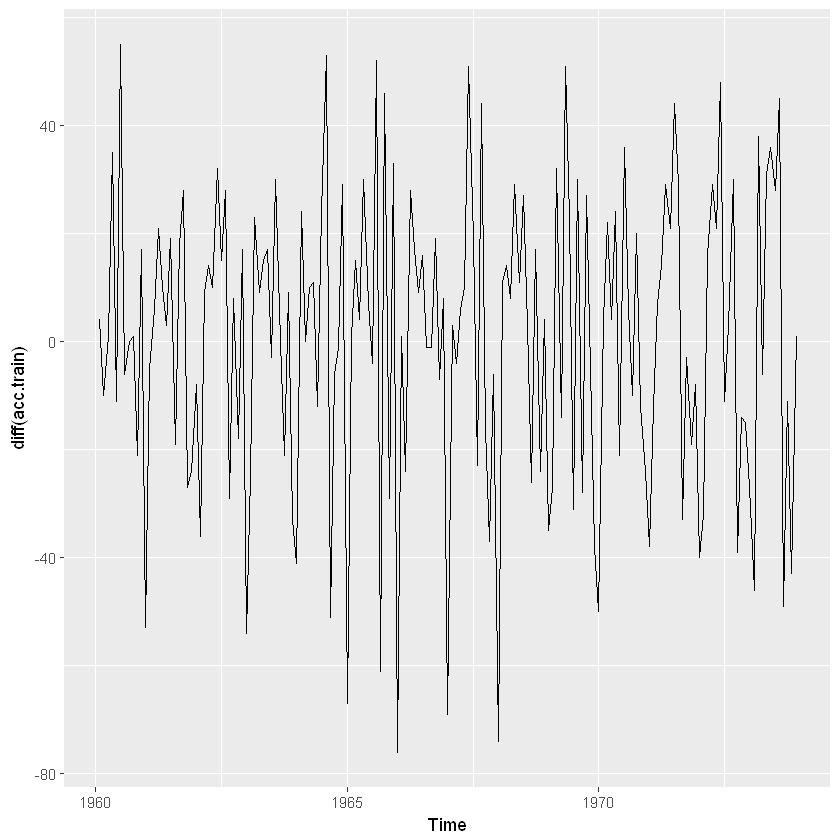

In [167]:
# Diferenciamos la serie (no estacionalmente)
autoplot(diff(acc.train))

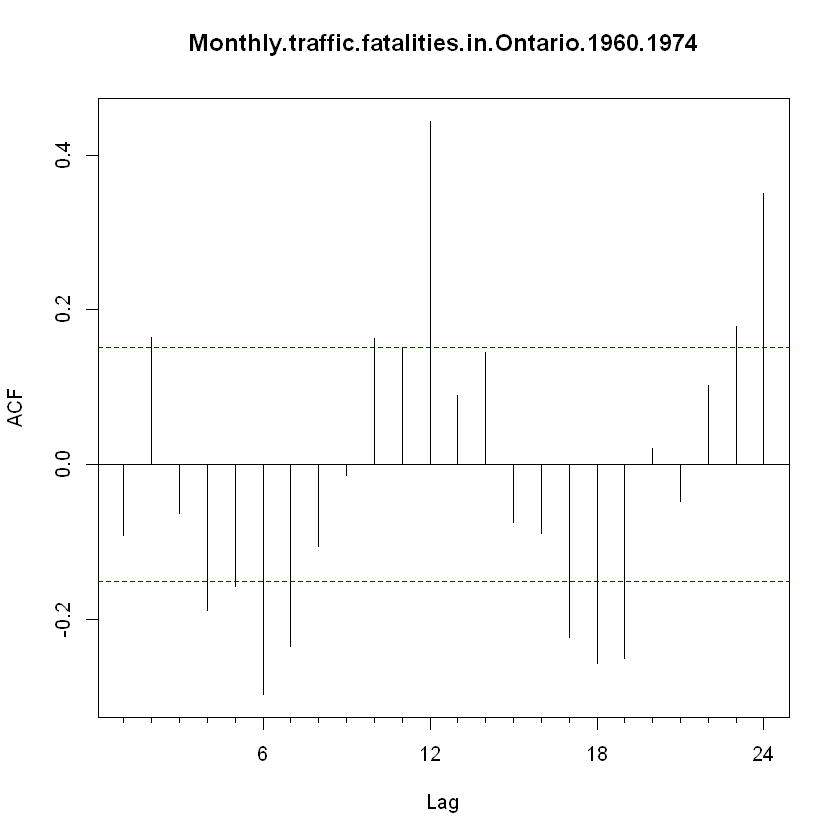

In [171]:
Acf(diff(acc.train)) # MA -> 0 | 2 (12)

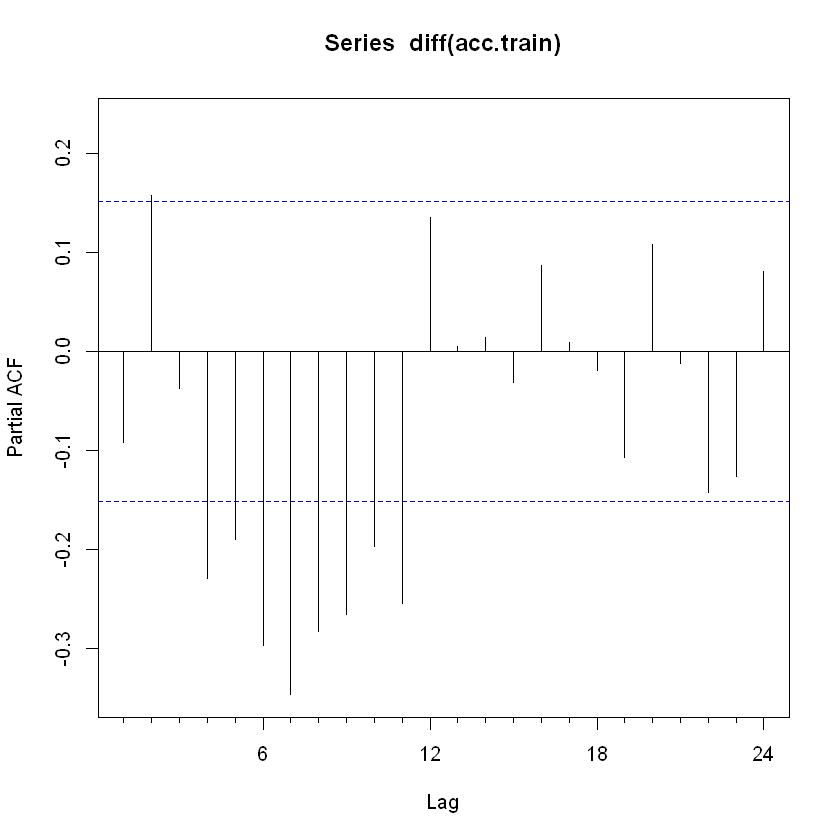

In [172]:
Pacf(diff(acc.train)) # AR -> 0 | 0 (12)

<br>

### Ajustamos un SARIMA(0,1,0)(0,0,2)12

In [173]:
model <- Arima(y = acc.train, order = c(0,1,0), seasonal = c(0,0,2))
summary(model) # AIC = 1550.38

Series: acc.train 
ARIMA(0,1,0)(0,0,2)[12]                    

Coefficients:
        sma1    sma2
      0.3918  0.2472
s.e.  0.0788  0.0739

sigma^2 estimated as 605.1:  log likelihood=-772.19
AIC=1550.38   AICc=1550.53   BIC=1559.73

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE     MASE       ACF1
Training set 0.3068305 24.37856 19.84998 -1.632044 15.91416 1.119117 -0.2672489


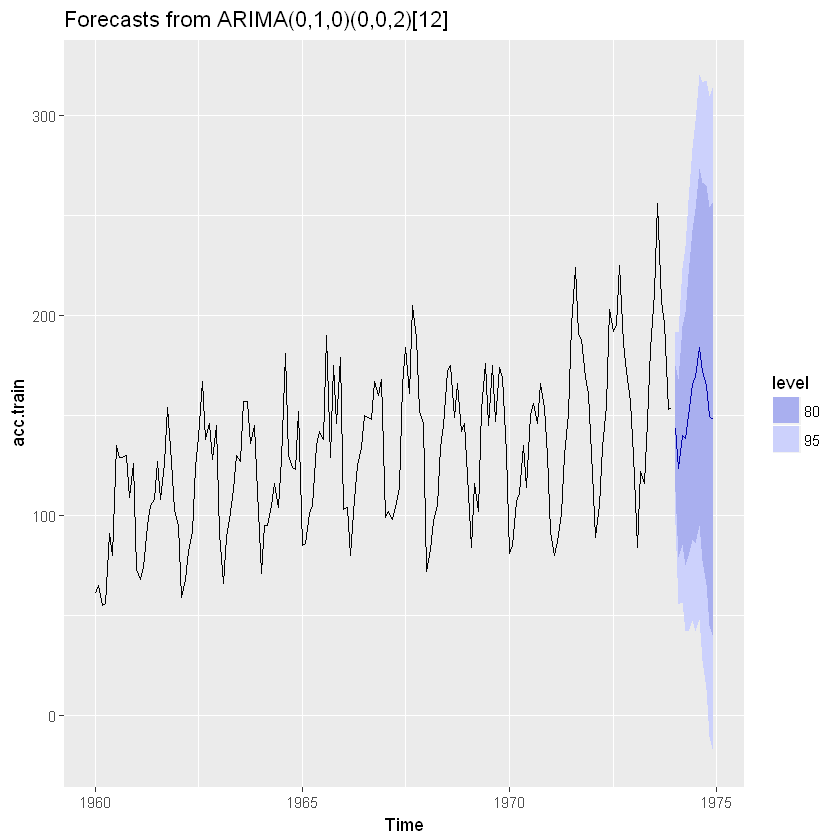

In [174]:
pred <- forecast(model, h = 12)
autoplot(pred)

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


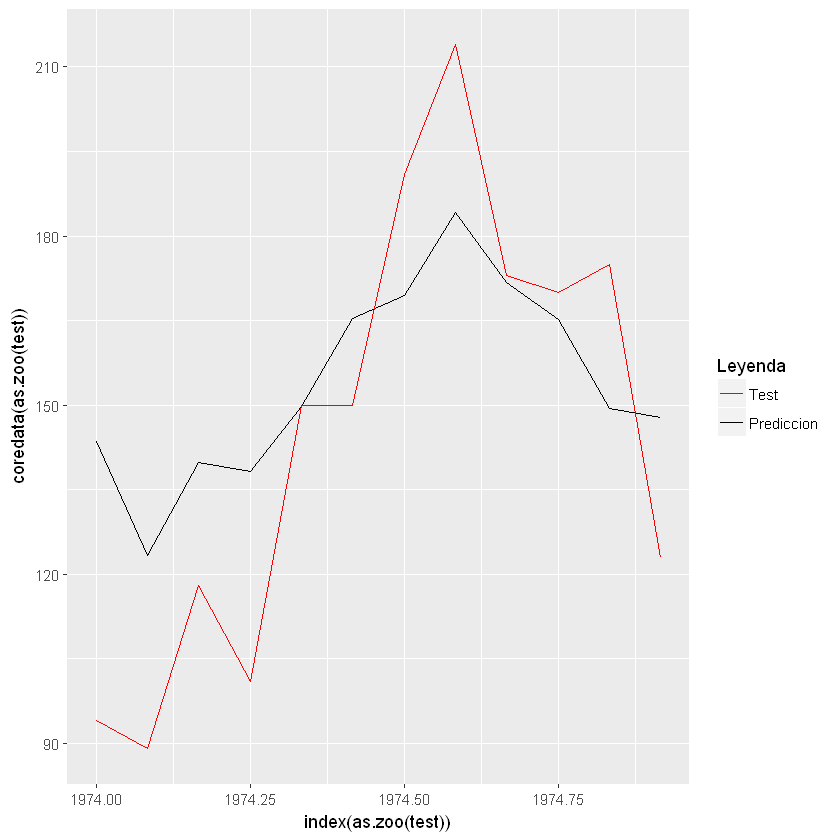

In [175]:
combine(pred$mean, acc.test)

In [176]:
accuracy(f = pred, x = acc.test) # MAE = 22.19949

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.3068305,24.37856,19.84998,-1.632044,15.91416,1.119117,-0.2672489,NA
Test set,-8.3045984,26.42141,22.19949,-11.114019,18.38221,1.251579,0.3732364,0.8223204



	Ljung-Box test

data:  Residuals from ARIMA(0,1,0)(0,0,2)[12]
Q* = 69.93, df = 22, p-value = 6.784e-07

Model df: 2.   Total lags used: 24



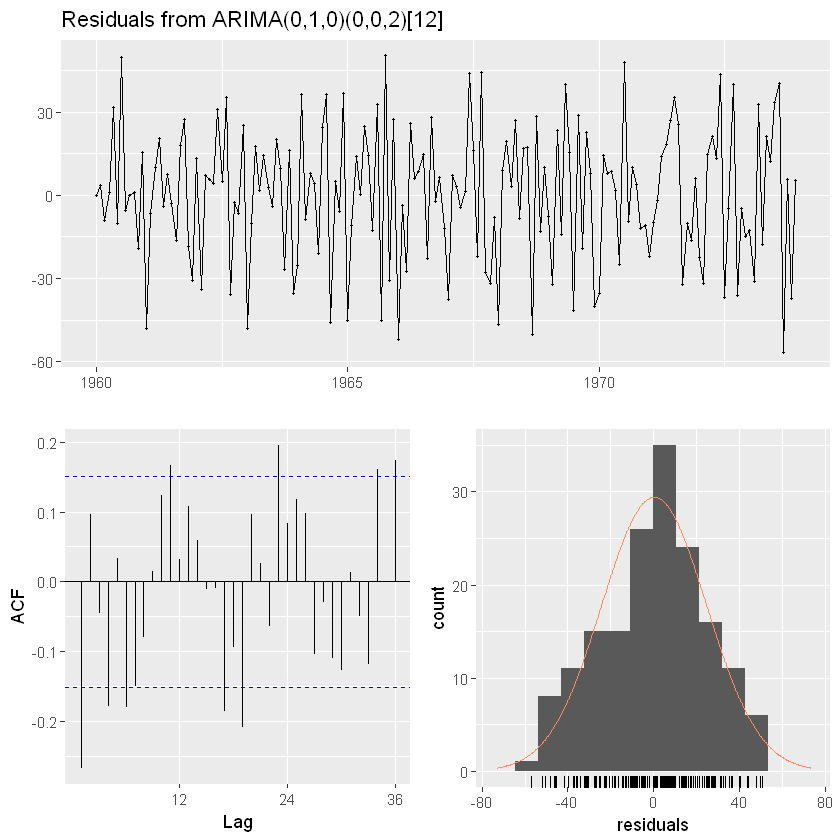

In [177]:
checkresiduals(model) # No son ruido blanco

<br>

### Diferenciamos estacionalmente para eliminar la estacionalidad

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


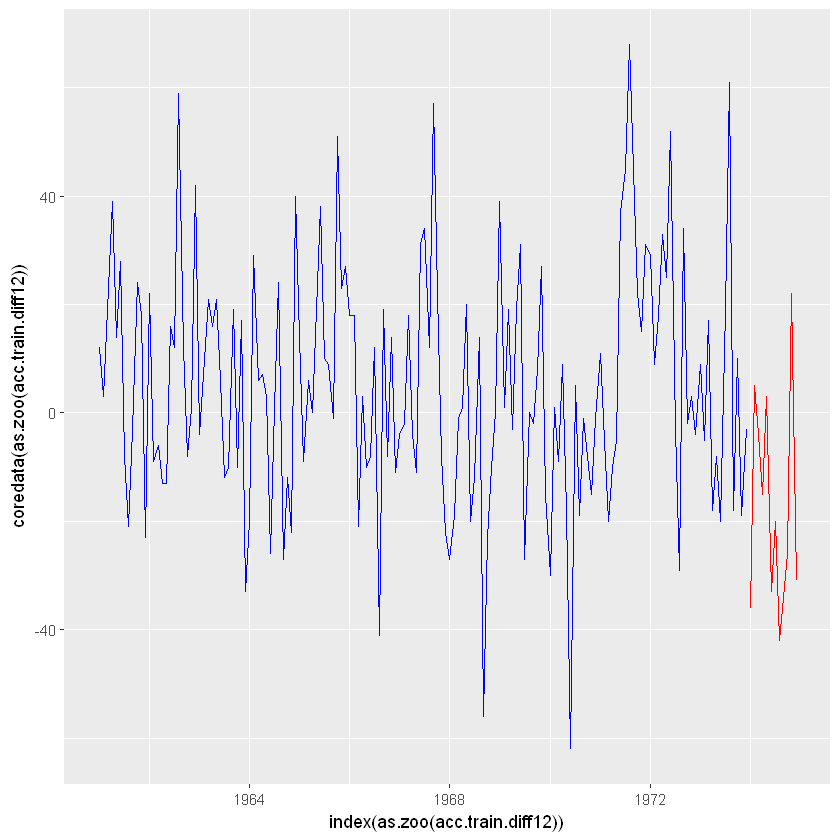

In [178]:
accidentes.diff12 <- diff(accidentes, 12) # perdemos un año de observaciones
acc.train.diff12 <- window(accidentes.diff12, start = c(1961,1), end = c(1973,12))
acc.test.diff12 <- window(accidentes.diff12, start = c(1974,1))

p <- ggplot() +
  geom_line(aes(x = index(as.zoo(acc.train.diff12)),
                y = coredata(as.zoo(acc.train.diff12))), col = 'blue') +
  geom_line(aes(x = index(as.zoo(acc.test.diff12)),
                y = coredata(as.zoo(acc.test.diff12))), col = 'red')
p

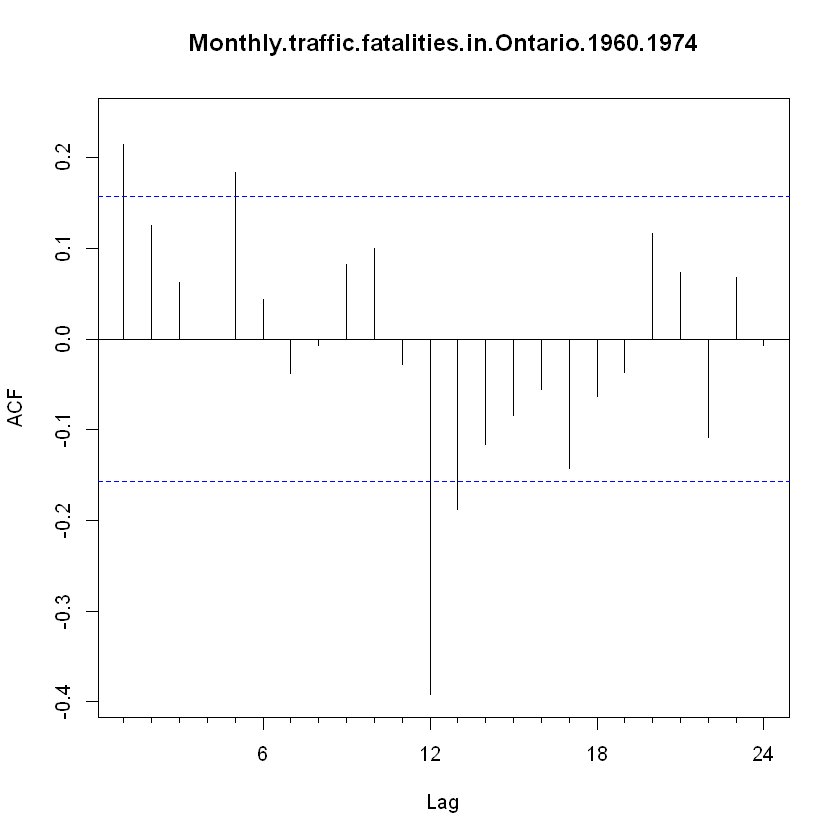

In [179]:
Acf(acc.train.diff12) # MA -> 1 | 1 (12)

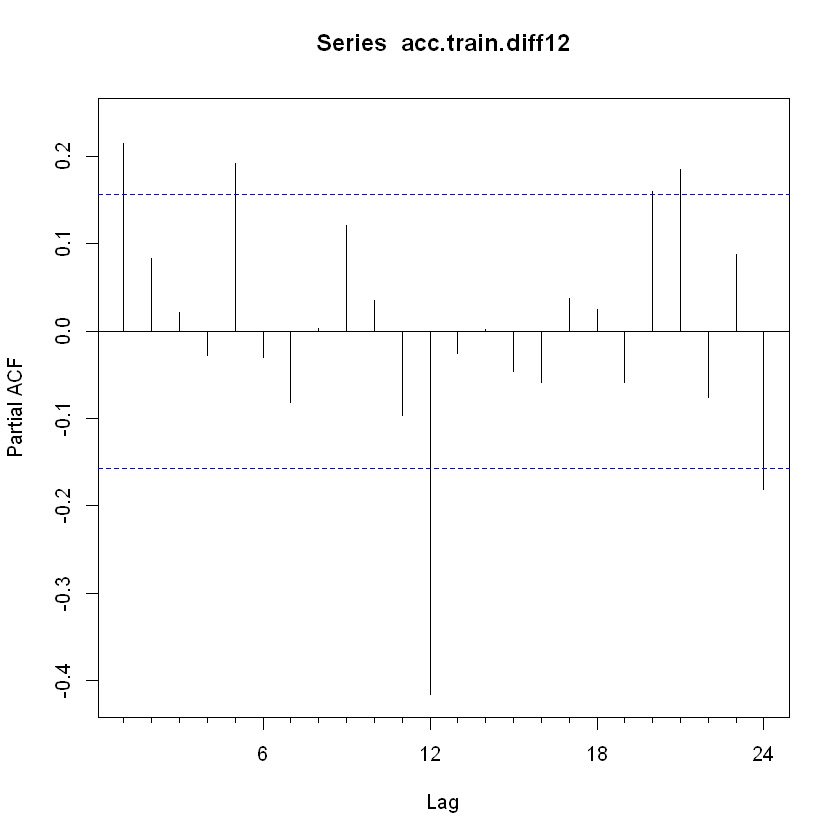

In [180]:
Pacf(acc.train.diff12)

<br>

### Ajustamos un SARIMA(1,0,1)(2,1,1)12 (Sin drift)

In [182]:
model.sin <- Arima(y = acc.train, order = c(1,0,1), seasonal = c(2,1,1), include.drift = FALSE) # Pasamos del log, apenas hay diferencias
summary(model.sin) # AIC = 1367.68

Series: acc.train 
ARIMA(1,0,1)(2,1,1)[12]                    

Coefficients:
         ar1      ma1    sar1     sar2     sma1
      0.9903  -0.8344  0.0538  -0.0155  -0.7807
s.e.  0.0186   0.0776  0.1215   0.1064   0.1163

sigma^2 estimated as 337.2:  log likelihood=-677.84
AIC=1367.68   AICc=1368.25   BIC=1385.98

Training set error measures:
                   ME    RMSE      MAE        MPE     MAPE      MASE       ACF1
Training set 1.469444 17.4093 12.95529 -0.3041653 9.953132 0.7304031 0.09781487


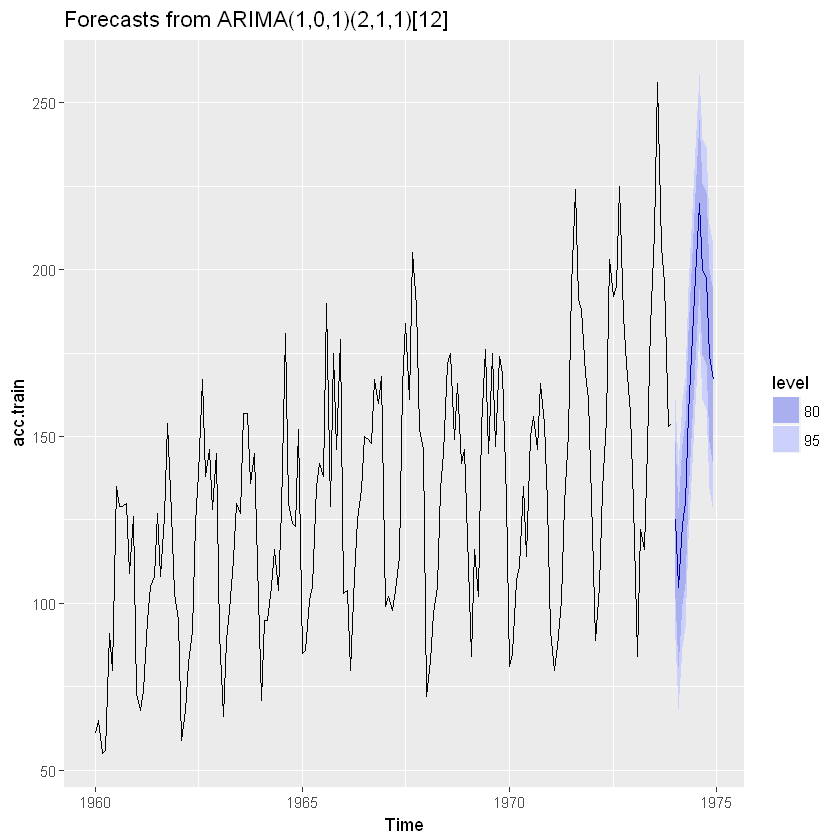

In [183]:
pred.sin <- forecast(model.sin, h = 12)
autoplot(pred.sin)

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


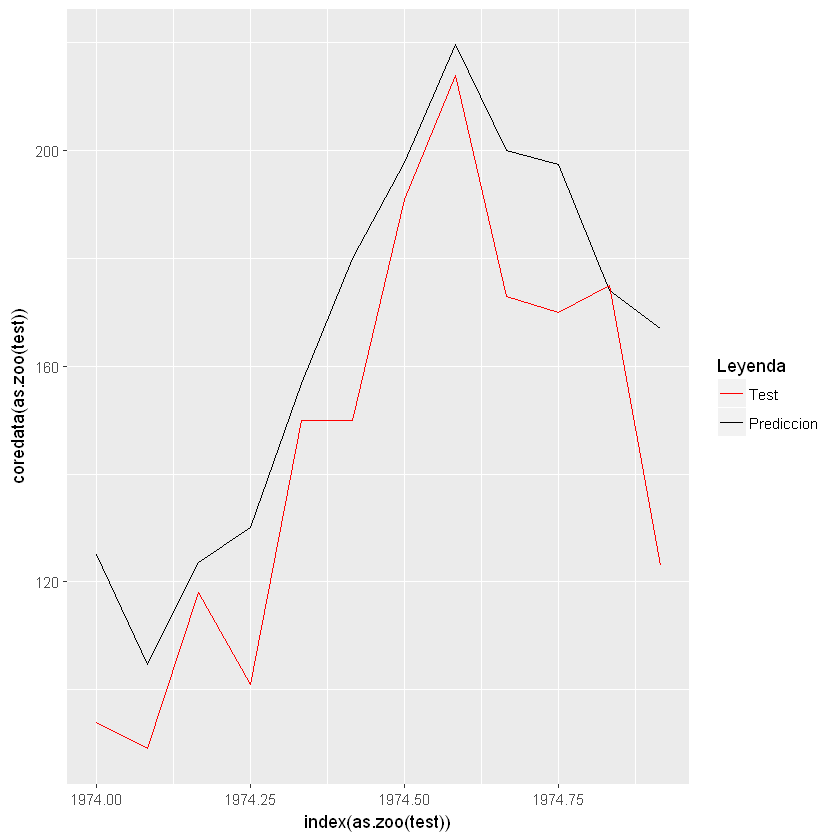

In [184]:
combine(pred.sin$mean, acc.test)

In [185]:
accuracy(pred.sin, acc.test) # MAE = 19.22651

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,1.469444,17.40930,12.95529,-0.3041653,9.953132,0.7304031,0.09781487,NA
Test set,-19.074259,23.38189,19.22651,-15.2036291,15.290632,1.0839668,-0.48541255,0.6503494



	Ljung-Box test

data:  Residuals from ARIMA(1,0,1)(2,1,1)[12]
Q* = 30.731, df = 19, p-value = 0.04321

Model df: 5.   Total lags used: 24



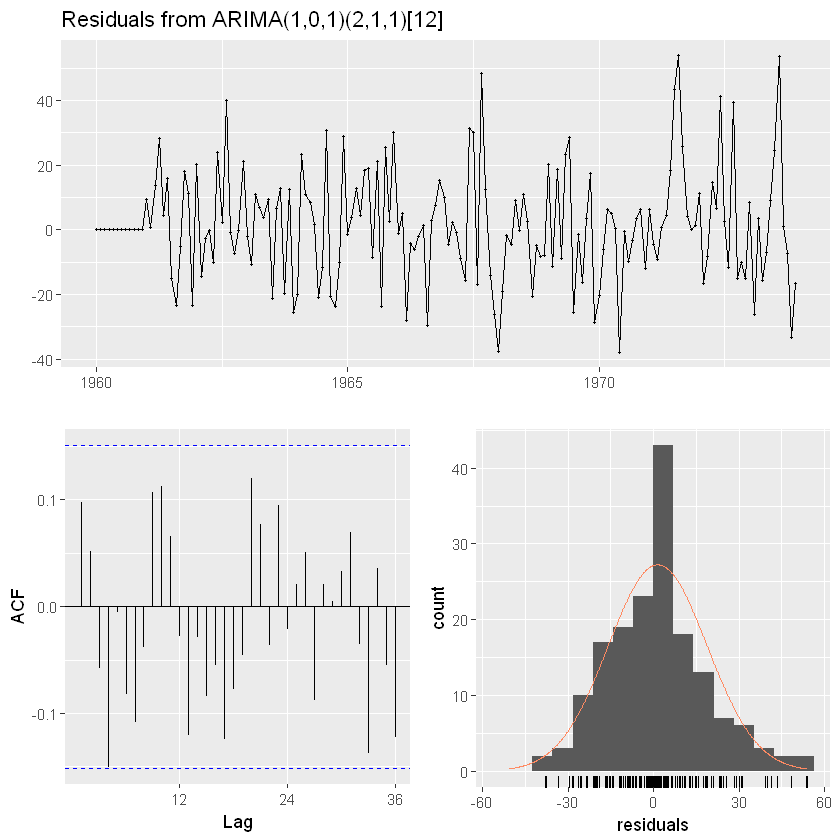

In [186]:
checkresiduals(model.sin) # 0.04321 No ruido blanco

<br>

### Ajustamos un SARIMA(1,0,1)(2,1,1)12 (Con drift)

In [187]:
model.con <- Arima(y = acc.train, order = c(1,0,1), seasonal = c(2,1,1), include.drift = TRUE) # Pasamos del log, apenas hay diferencias
summary(model.con) # AIC = 1360.58

Series: acc.train 
ARIMA(1,0,1)(2,1,1)[12] with drift         

Coefficients:
         ar1      ma1    sar1     sar2     sma1   drift
      0.6002  -0.3557  0.1327  -0.0254  -0.8984  0.3571
s.e.  0.1855   0.2168  0.1112   0.1032   0.1468  0.0507

sigma^2 estimated as 304.8:  log likelihood=-672.91
AIC=1359.82   AICc=1360.58   BIC=1381.17

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.5676732 16.49563 12.44373 -0.944418 9.634101 0.7015622
                    ACF1
Training set -0.01411564


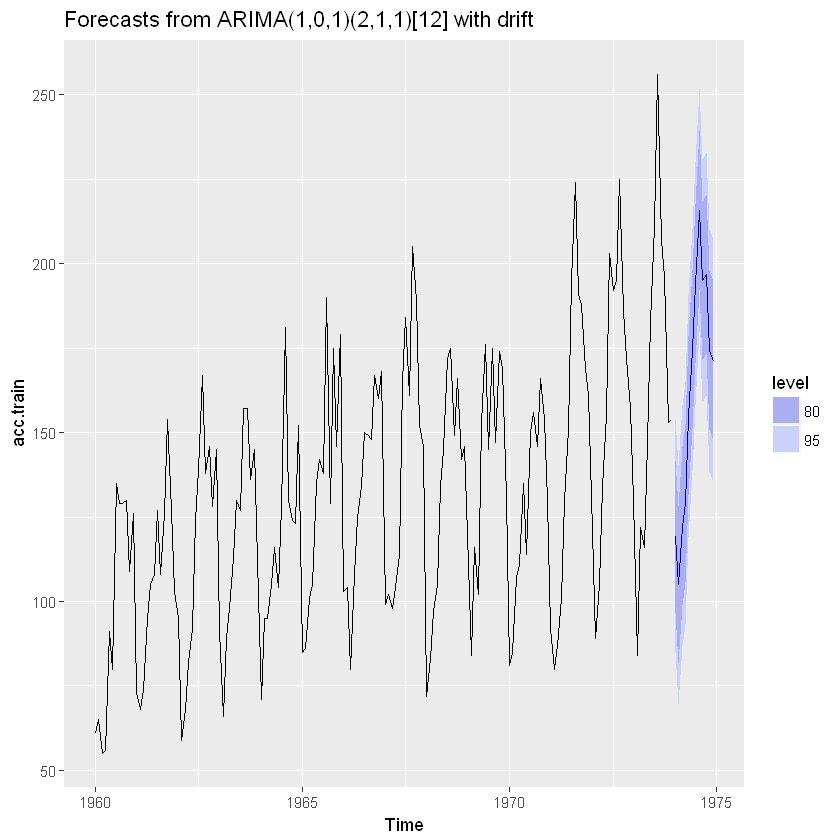

In [188]:
pred.con <- forecast(model.con, h = 12)
autoplot(pred.con)

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


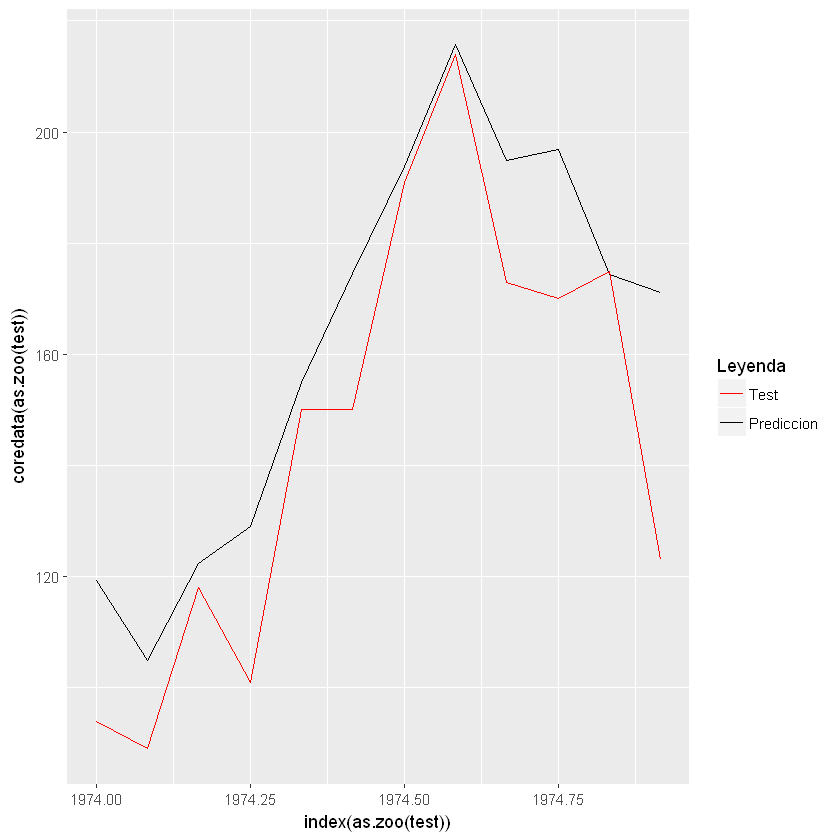

In [189]:
combine(pred.con$mean, acc.test)

In [190]:
accuracy(pred.con, acc.test) # MAE = 17.0999

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.5676732,16.49563,12.44373,-0.944418,9.634101,0.7015622,-0.01411564,NA
Test set,-17.0007824,22.09167,17.09992,-13.788652,13.845303,0.9640722,-0.41828308,0.6255795



	Ljung-Box test

data:  Residuals from ARIMA(1,0,1)(2,1,1)[12] with drift
Q* = 21.091, df = 18, p-value = 0.2748

Model df: 6.   Total lags used: 24



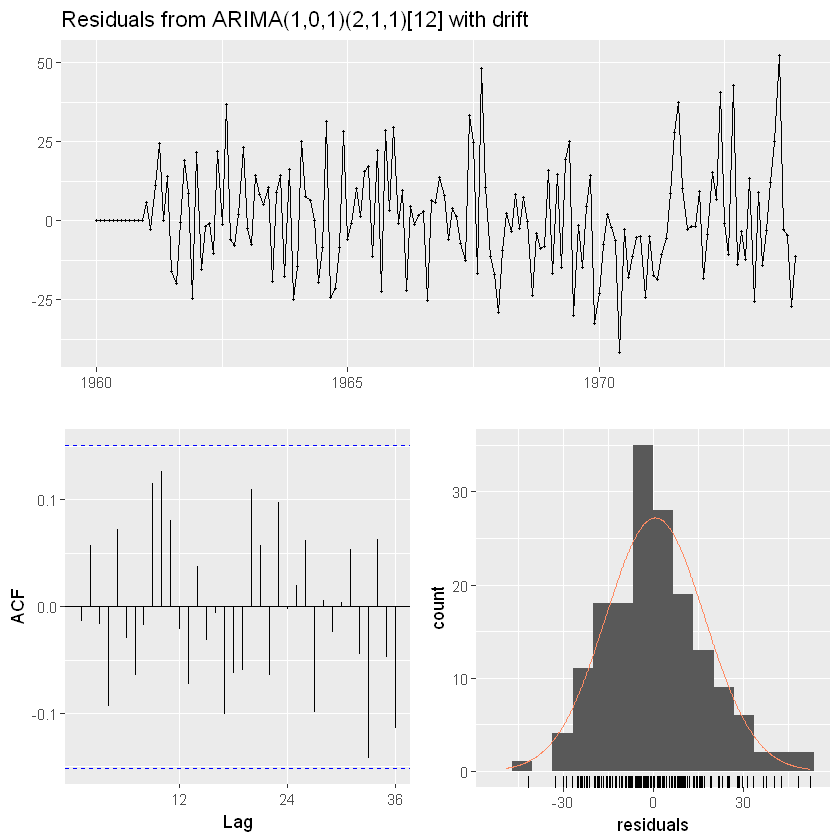

In [191]:
checkresiduals(model.con) # 0.2748 Ruido blanco

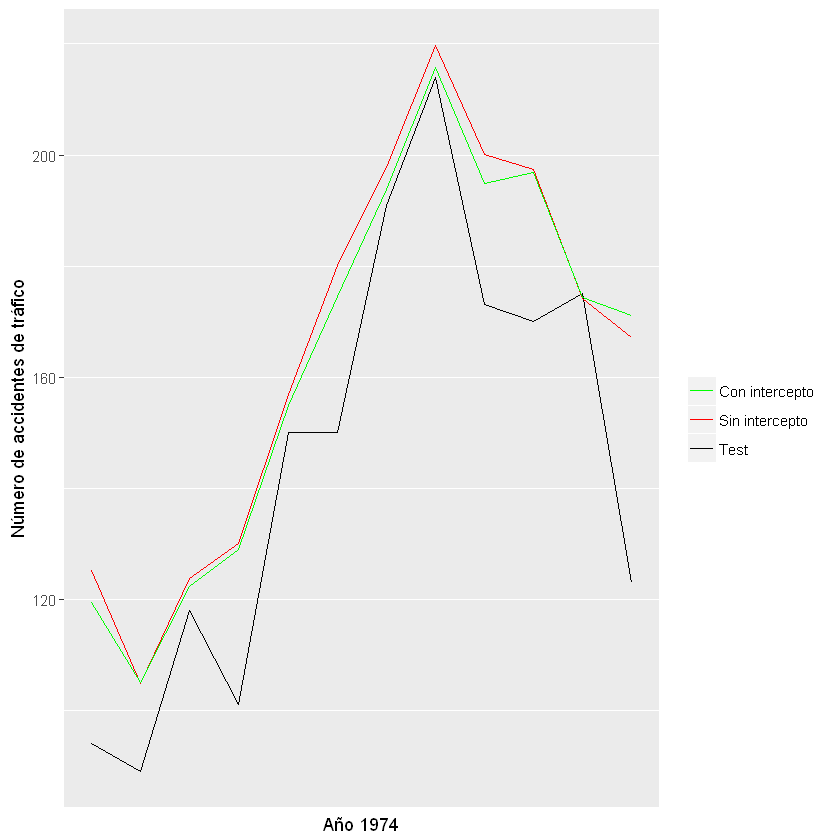

In [192]:
# Comparando predicciones respecto al drift
comp <- ggplot() +
  geom_line(aes(x = index(as.zoo(acc.test)), y = coredata(as.zoo(acc.test)), colour = 'Test')) +
  geom_line(aes(x = index(as.zoo(acc.test)), y = pred.sin$mean, colour = 'Sin intercepto')) +
  geom_line(aes(x = index(as.zoo(acc.test)), y = pred.con$mean, colour = 'Con intercepto')) +
  scale_color_manual(name = '', values = c('Test' = 'black', 'Sin intercepto' = 'red',
                                           'Con intercepto' = 'green'),
                     labels = c('Con intercepto', 'Sin intercepto', 'Test')) + ylab('Número de accidentes de tráfico') +
  xlab('Año 1974') + scale_x_continuous(breaks = c(), labels = c())
comp

<br>

### Selección automática del modelo (SARIMA(1,0,0)(1,0,0)12)

In [193]:
model <- auto.arima(y = acc.train, test = 'adf')
summary(model) # AIC = 1514.22

Series: acc.train 
ARIMA(1,0,0)(1,0,0)[12] with non-zero mean 

Coefficients:
         ar1    sar1      mean
      0.4595  0.6948  130.7275
s.e.  0.0880  0.0738    8.4589

sigma^2 estimated as 444.6:  log likelihood=-753.11
AIC=1514.22   AICc=1514.47   BIC=1526.72

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE       ACF1
Training set 1.481911 20.89727 16.32299 -2.080903 13.43304 0.9202698 -0.0813211


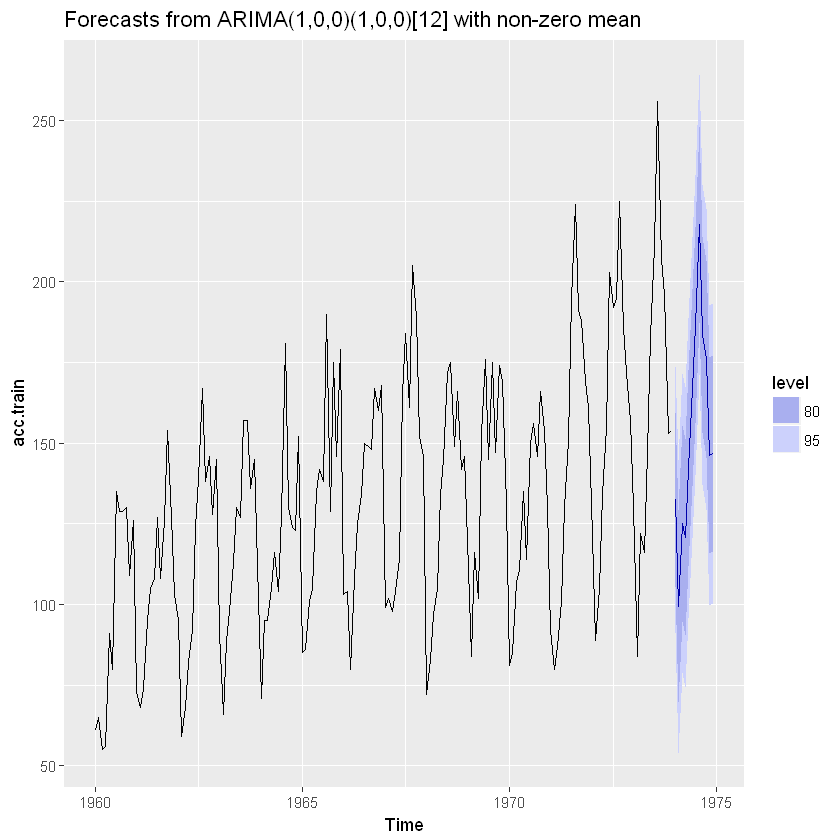

In [194]:
pred <- forecast(model, h = 12)
autoplot(pred)

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


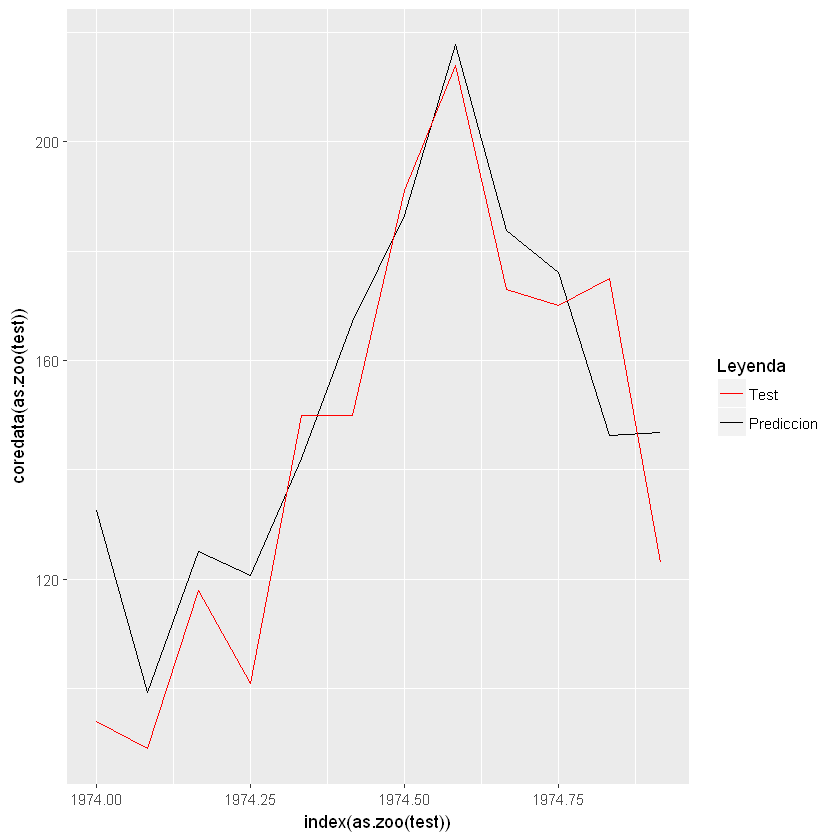

In [195]:
combine(pred$mean, acc.test)

In [196]:
accuracy(pred, acc.test) # MAE = 14.86938

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,1.481911,20.89727,16.32299,-2.080903,13.43304,0.9202698,-0.0813211,NA
Test set,-8.013324,18.19253,14.86938,-8.041157,12.04800,0.8383172,-0.2694620,0.4505771



	Ljung-Box test

data:  Residuals from ARIMA(1,0,0)(1,0,0)[12] with non-zero mean
Q* = 47.319, df = 21, p-value = 0.0008506

Model df: 3.   Total lags used: 24



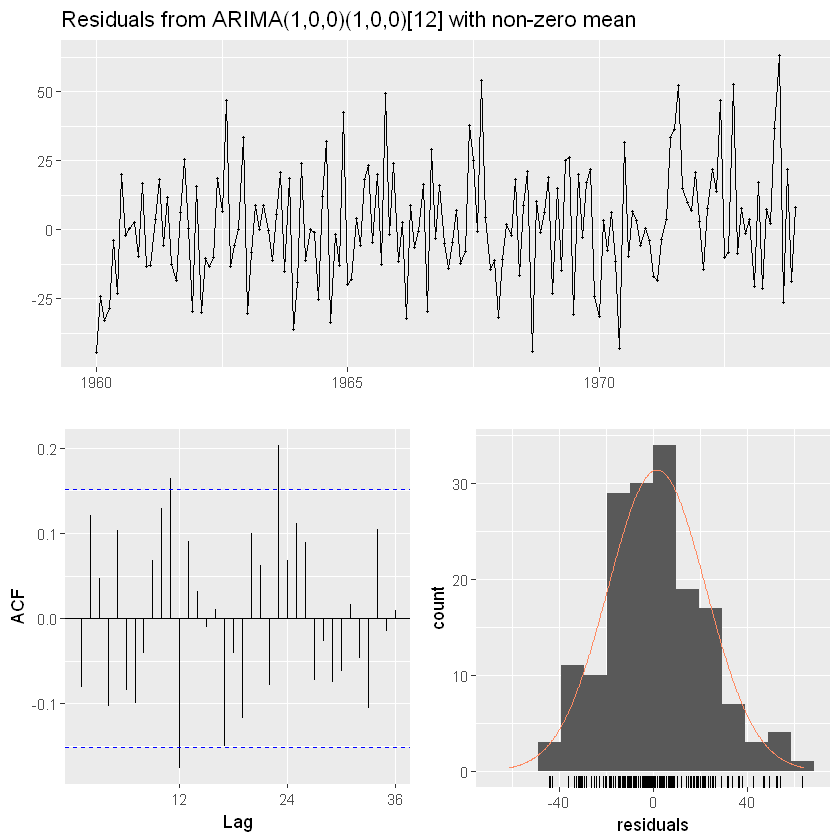

In [197]:
checkresiduals(model) # No son ruido blanco

<br>

### Selección automática del modelo (sin ahorrar coste computacional) (SARIMA (2,0,0)(2,0,0)12)

In [199]:
model <- auto.arima(acc.train, test = 'adf', max.order = 7, stepwise = FALSE, approximation = FALSE)
summary(model) # AICc = 1499.24

Series: acc.train 
ARIMA(2,0,0)(2,0,0)[12] with non-zero mean 

Coefficients:
         ar1     ar2    sar1    sar2      mean
      0.3310  0.2098  0.4852  0.3263  130.4488
s.e.  0.0827  0.0765  0.0774  0.0804   12.6991

sigma^2 estimated as 393.4:  log likelihood=-743.62
AIC=1499.24   AICc=1499.77   BIC=1517.99

Training set error measures:
                   ME     RMSE      MAE        MPE     MAPE      MASE
Training set 2.151158 19.53816 15.07484 -0.9899178 12.21712 0.8499005
                    ACF1
Training set -0.02670233


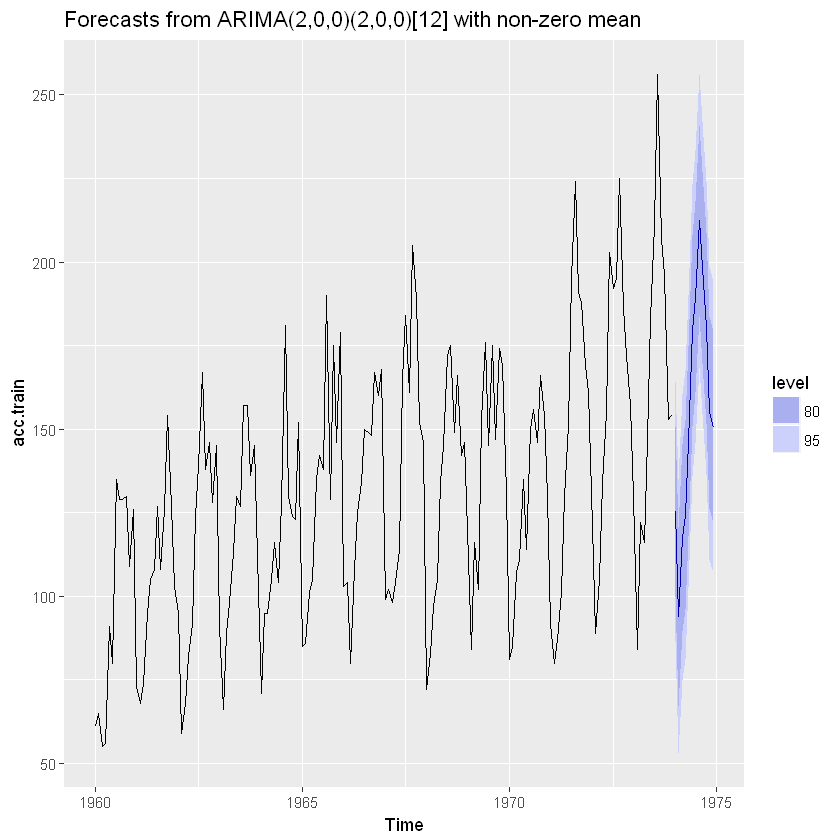

In [200]:
pred <- forecast(model, h = 12)
autoplot(pred)

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


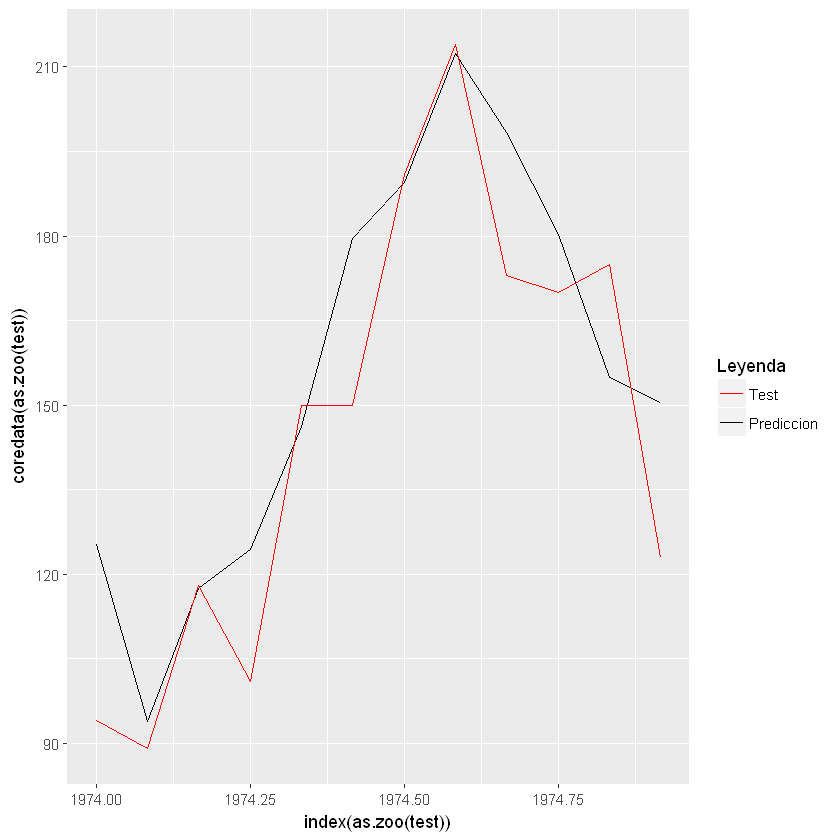

In [201]:
combine(pred$mean, acc.test)

In [202]:
accuracy(pred, acc.test) # MAE = 14.96979

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.151158,19.53816,15.07484,-0.9899178,12.21712,0.8499005,-0.02670233,NA
Test set,-10.402322,19.02877,14.96979,-9.0604023,11.71312,0.8439780,-0.47027508,0.4881124



	Ljung-Box test

data:  Residuals from ARIMA(2,0,0)(2,0,0)[12] with non-zero mean
Q* = 40.624, df = 19, p-value = 0.002708

Model df: 5.   Total lags used: 24



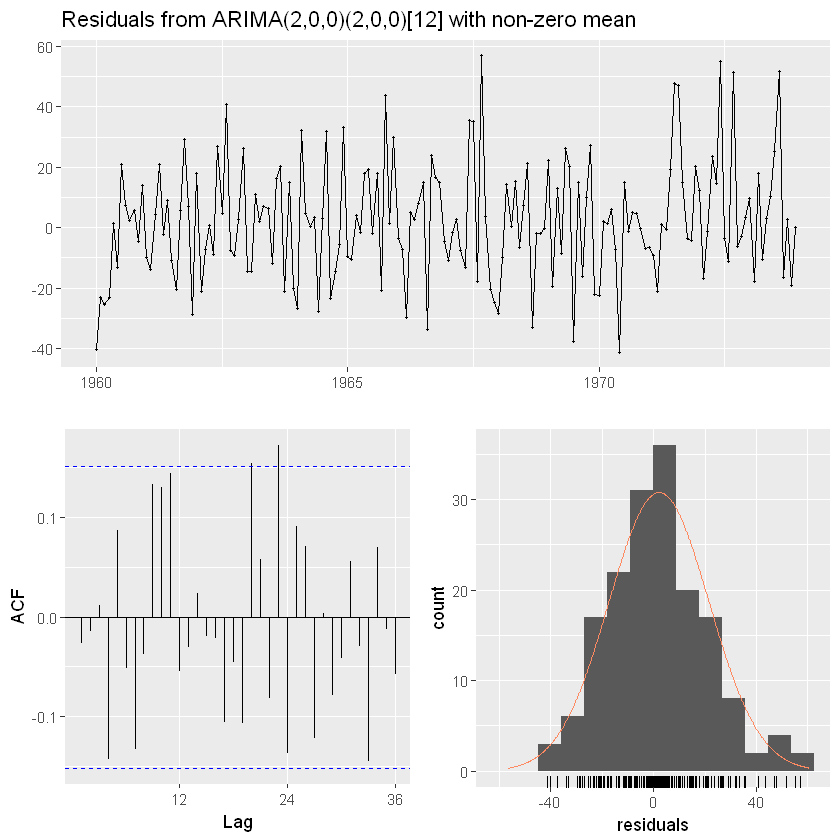

In [203]:
checkresiduals(model) # No son ruido blanco

<br>

### Selección automática del modelo (sin ahorrar coste computacional) (SARIMA (1,1,4)(2,0,0)12)

In [205]:
model <- auto.arima(acc.train, max.order = 7, stepwise = FALSE, approximation = FALSE)
summary(model) # AICc = 1485.29

Series: acc.train 
ARIMA(1,1,4)(2,0,0)[12]                    

Coefficients:
          ar1     ma1      ma2      ma3      ma4    sar1    sar2
      -0.6778  0.0114  -0.4697  -0.1483  -0.2960  0.4631  0.3398
s.e.   0.2153  0.2017   0.1660   0.0772   0.0829  0.0785  0.0802

sigma^2 estimated as 377:  log likelihood=-734.65
AIC=1485.29   AICc=1486.2   BIC=1510.24

Training set error measures:
                   ME     RMSE      MAE         MPE     MAPE      MASE
Training set 2.379826 18.94959 14.58401 -0.06474681 11.39818 0.8222284
                    ACF1
Training set -0.02640928


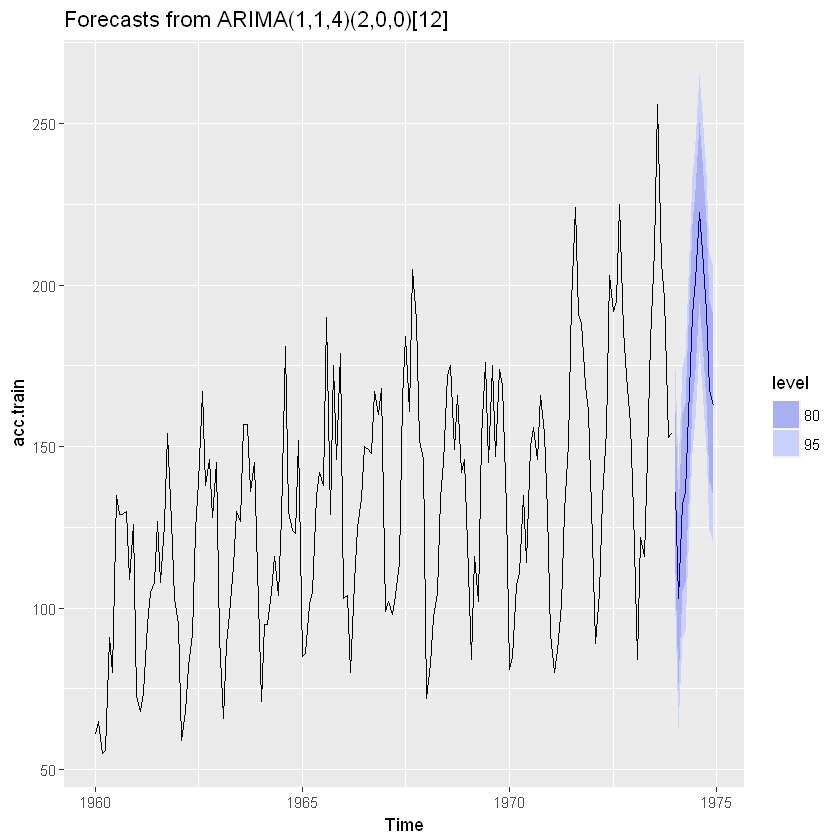

In [206]:
pred <- forecast(model, h = 12)
autoplot(pred)

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


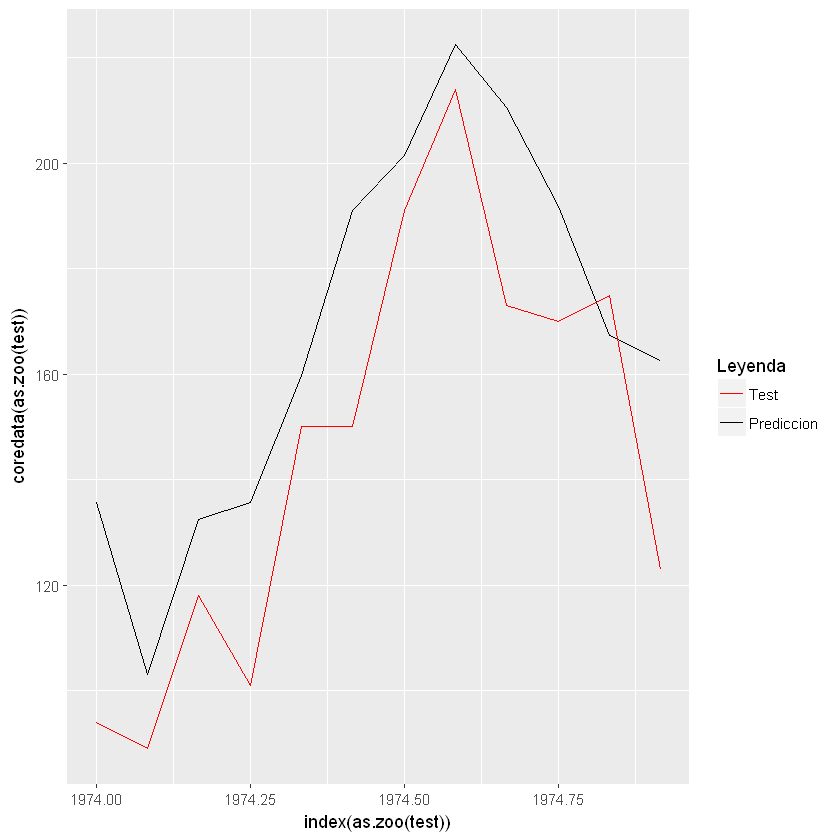

In [207]:
combine(pred$mean, acc.test)

In [208]:
accuracy(pred, acc.test) # MAE = 14.96979

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.379826,18.94959,14.58401,-0.06474681,11.39818,0.8222284,-0.02640928,NA
Test set,-22.183257,27.12400,23.44705,-17.71587342,18.43804,1.3219152,-0.46678224,0.7497104



	Ljung-Box test

data:  Residuals from ARIMA(1,1,4)(2,0,0)[12]
Q* = 32.371, df = 17, p-value = 0.01353

Model df: 7.   Total lags used: 24



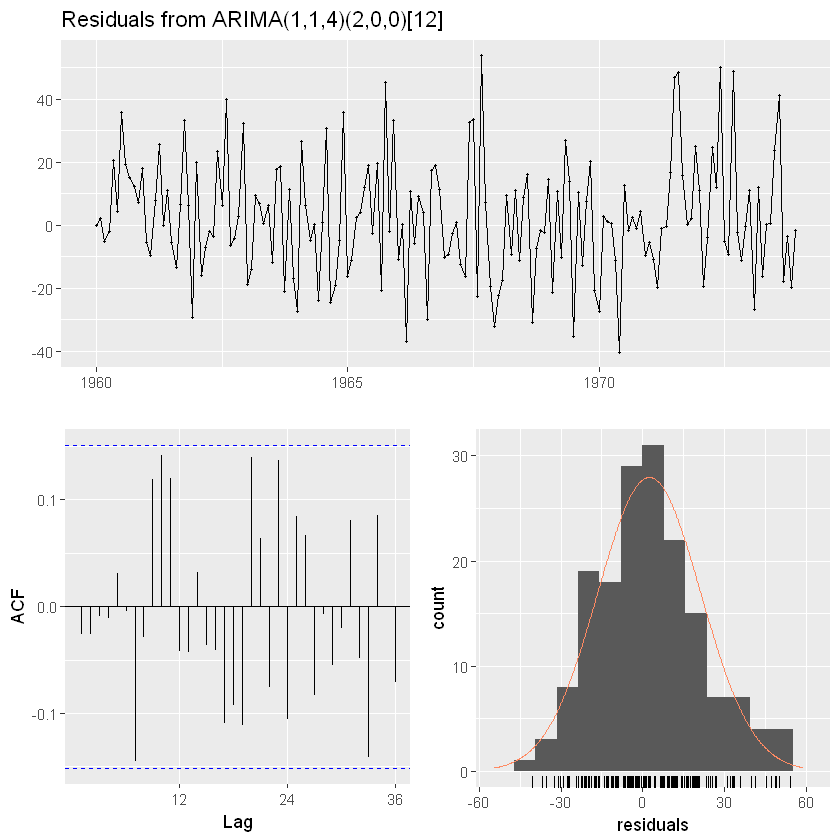

In [209]:
checkresiduals(model) # No son ruido blanco